---
title: "Exploratory Data Analysis"
format:
    html:
        embed-resources: true
        code-fold: false
---

# Motivation and Objectives

Exploratory Data Analysis (EDA) serves as the critical foundation for understanding the complex clinical landscape of cancer patient data before building predictive models. Our analysis focuses on two major cancer types affecting women: **Breast Invasive Carcinoma (BRCA)** and **Cervical Squamous Cell Carcinoma (CESC)** from The Cancer Genome Atlas (TCGA).

## Why EDA is Essential for Cancer Data

Cancer datasets present unique analytical challenges that make thorough exploration crucial:

1. **Multi-dimensional Clinical Complexity**: Cancer progression involves intricate relationships between patient demographics, tumor characteristics, staging systems (AJCC, FIGO), treatment modalities, and survival outcomes that required systematic investigation.

2. **Data Quality Assessment**: EDA was also a process enabling us to assess the effectiveness of our data cleaning stage.

3. **Feature Engineering Insights**: Understanding distributions and relationships helped identify opportunities for creating meaningful derived features (e.g., ordinal encoding of cancer stages, treatments offered).

4. **Model Selection Guidance**: EDA revealed whether relationships are linear or non-linear, helping inform appropriate algorithm choices for subsequent supervised and unsupervised learning tasks.

## Research Questions Driving Our Analysis

Our EDA is designed to answer key questions that will inform our modeling strategy:

- **Survival Patterns**: How do survival times vary between BRCA and CESC patients? What are the distributional characteristics of our regression target?
- **Staging Relationships**: How do different staging systems (AJCC pathologic staging, FIGO staging for cervical cancer) relate to patient outcomes?
- **Treatment Impact**: What treatment patterns exist, and how do they correlate with survival outcomes?
- **Feature Relationships**: Which clinical variables show the strongest associations with survival time and each other?
- **Data Completeness**: Where are the gaps in our data, and how might they impact model performance?

## Expected Outcomes

Through systematic exploration, we aimed to:

- Identify the most informative features for survival prediction
- Detect potential confounding variables or selection biases
- Establish baseline expectations for model performance
- Generate hypotheses about cancer survival mechanisms for validation in supervised learning

In [ ]:
#| echo: false
#| warning: false

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
#| echo: false
#| warning: false

# Set pandas options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Breast (BRCA) Cancer Exploratory Data Analysis (EDA)

In [ ]:
#| echo: false
#| warning: false

# Load Breast Cancer dataset

brca_df = pd.read_csv(Path('../../data/processed-data/brca/brca-clinical-processed.tsv'), sep='\t')
cesc_df = pd.read_csv(Path('../../data/processed-data/cesc/cesc-clinical-processed.tsv'), sep='\t')

In [ ]:
#| echo: false
#| warning: false

# Data Overview
print("BRCA Dataset Overview:")
print(f"Shape: {brca_df.shape}")
print(f"\nColumns: {list(brca_df.columns)}")

BRCA Dataset Overview:
Shape: (4920, 38)

Columns: ['project.project_id', 'cases.case_id', 'cases.disease_type', 'cases.index_date', 'cases.primary_site', 'cases.submitter_id', 'demographic.age_is_obfuscated', 'demographic.days_to_death', 'demographic.ethnicity', 'demographic.gender', 'demographic.race', 'demographic.submitter_id', 'demographic.vital_status', 'diagnoses.age_at_diagnosis', 'diagnoses.ajcc_pathologic_m', 'diagnoses.ajcc_pathologic_n', 'diagnoses.ajcc_pathologic_stage', 'diagnoses.ajcc_pathologic_t', 'diagnoses.classification_of_tumor', 'diagnoses.days_to_diagnosis', 'diagnoses.days_to_last_follow_up', 'diagnoses.diagnosis_is_primary_disease', 'diagnoses.laterality', 'diagnoses.method_of_diagnosis', 'diagnoses.morphology', 'diagnoses.primary_diagnosis', 'diagnoses.prior_malignancy', 'diagnoses.prior_treatment', 'diagnoses.site_of_resection_or_biopsy', 'diagnoses.sites_of_involvement', 'diagnoses.submitter_id', 'diagnoses.synchronous_malignancy', 'diagnoses.tissue_or_organ

## Univariate Analysis (Single Feature)
- **Frequency Counts**: For categorical features (e.g., vital_status, ajcc_pathological_stage, classification_of_tumor, treatment_type, laterality, diagnoses.behavior), visualize frequency distribution (bar charts).
- **Age Distribution**: Analyze the range and spread of age at diagnoses data (histograms, box plots).
- **Survival time distribution** See the spread of survival_time_days (histograms, box plots).
- **Race distribution**

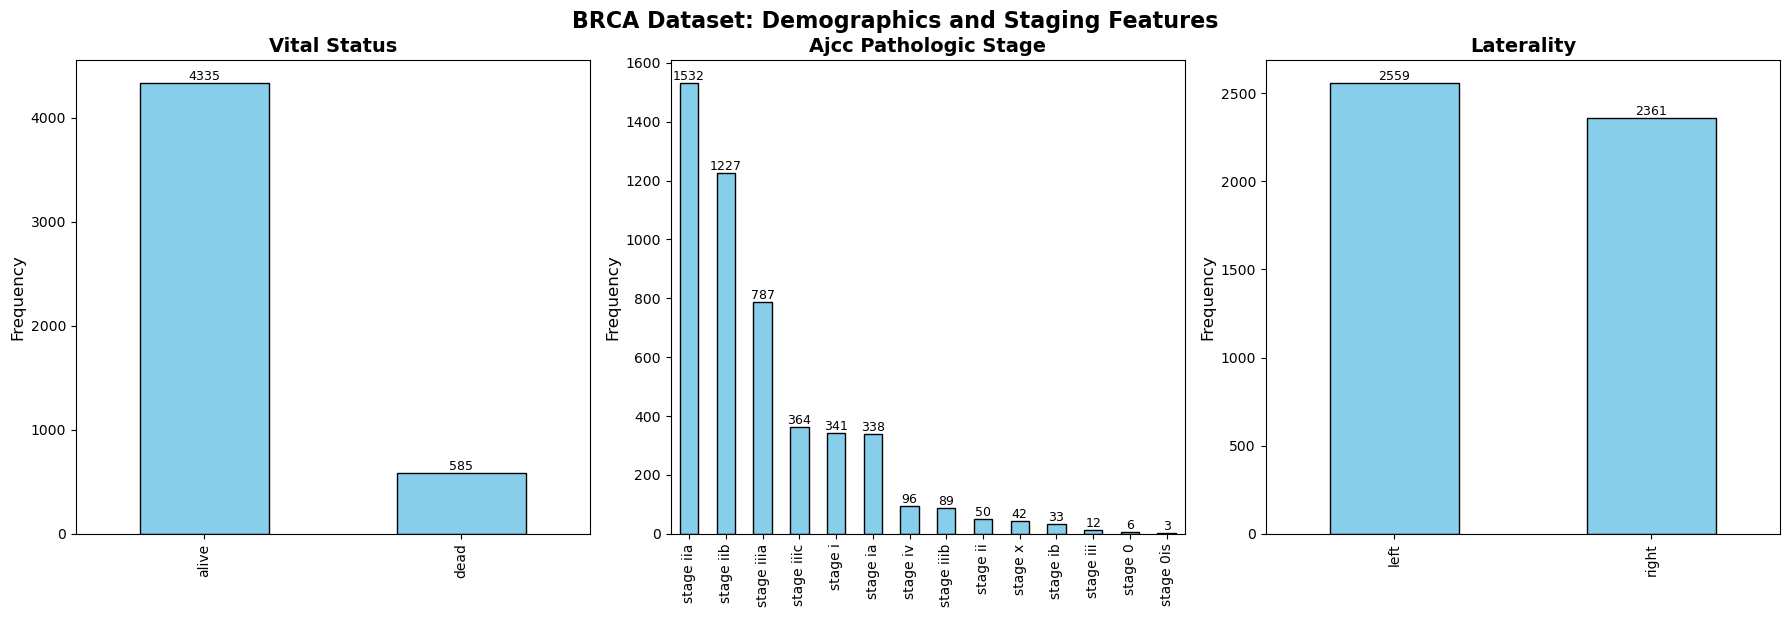

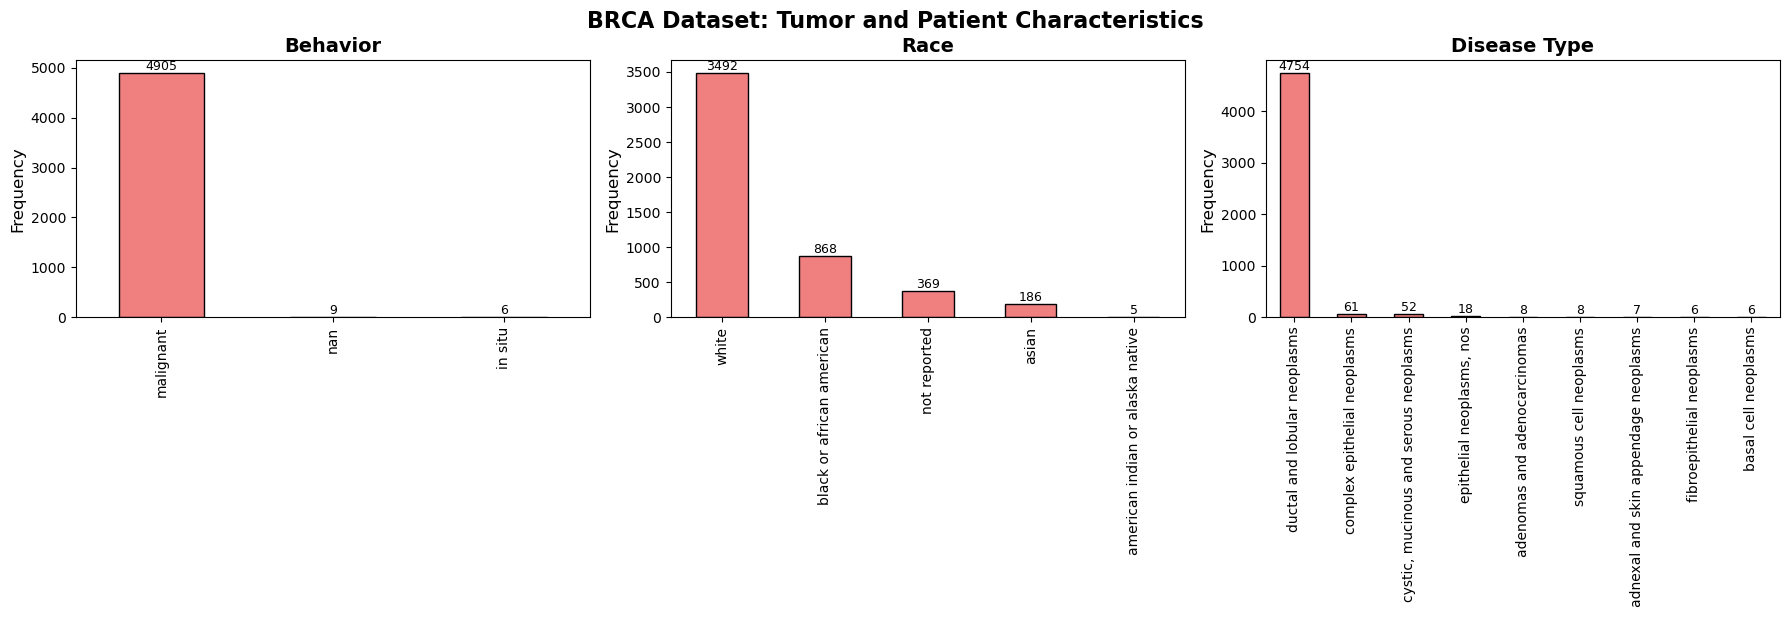

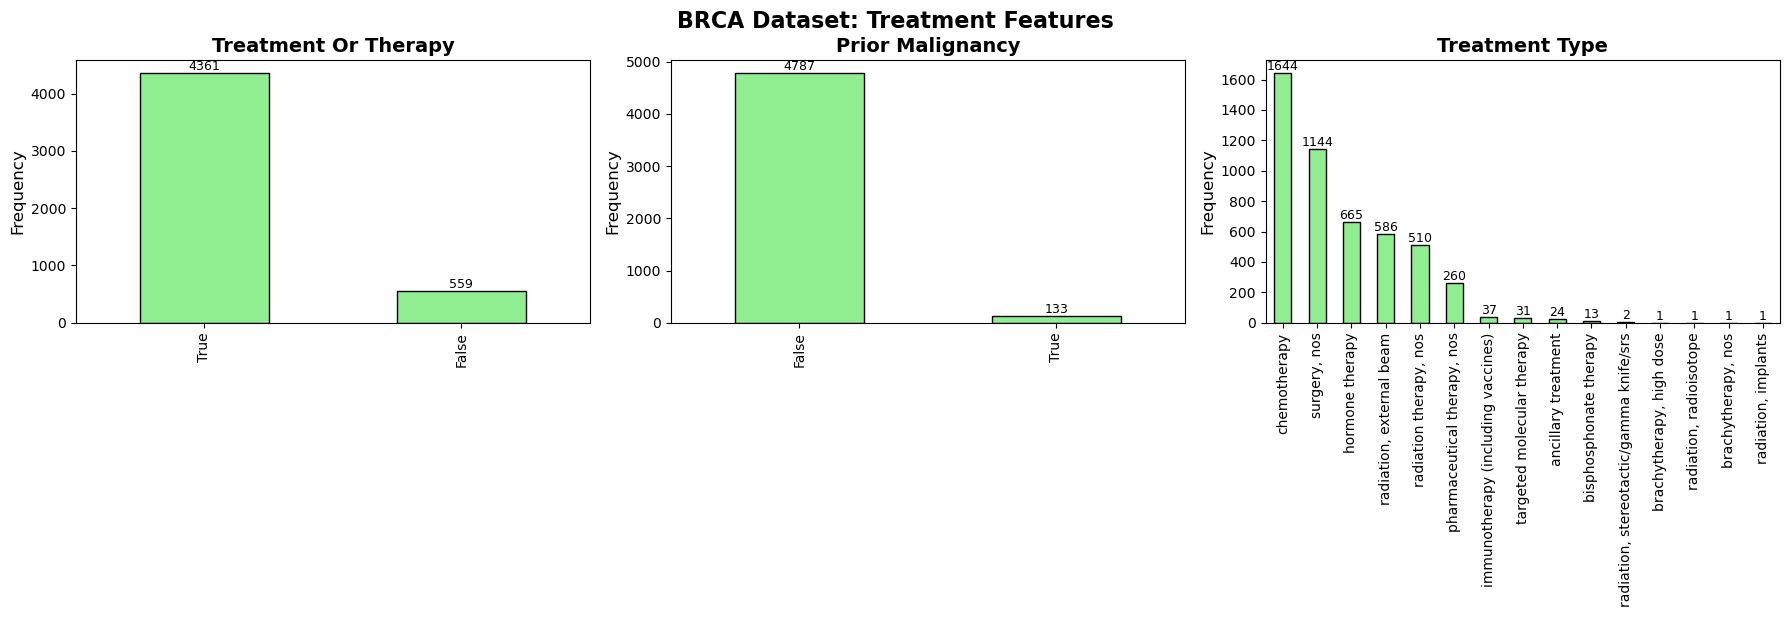

In [ ]:
#| echo: false
#| warning: false

# UNIVARIATE ANALYSIS

# Key categorical features to analyze
key_categorical = [
    'demographic.vital_status', 'diagnoses.ajcc_pathologic_stage', 
    'diagnoses.laterality', 'diagnoses.behavior', 'demographic.race',
    'cases.disease_type', 'treatments.treatment_or_therapy',
    'diagnoses.prior_malignancy', 'treatments.treatment_type'
]

# Split into three groups for better visualization
group1 = key_categorical[:3]  # Demographics and staging
group2 = key_categorical[3:6]  # Behavior, race, disease type
group3 = key_categorical[6:]   # Treatment features

# Plot Group 1: Demographics and Staging
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(group1):
    value_counts = brca_df[col].value_counts(dropna=False)
    value_counts.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col.split(".")[-1].replace("_", " ").title()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add value labels on bars
    for bar in axes[i].patches:
        height = bar.get_height()
        if height > 0:
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('BRCA Dataset: Demographics and Staging Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Plot Group 2: Tumor Characteristics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(group2):
    value_counts = brca_df[col].value_counts(dropna=False)
    value_counts.plot(kind='bar', ax=axes[i], color='lightcoral', edgecolor='black')
    axes[i].set_title(f'{col.split(".")[-1].replace("_", " ").title()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add value labels on bars
    for bar in axes[i].patches:
        height = bar.get_height()
        if height > 0:
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('BRCA Dataset: Tumor and Patient Characteristics', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Plot Group 3: Treatment Features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(group3):
    value_counts = brca_df[col].value_counts(dropna=False)
    value_counts.plot(kind='bar', ax=axes[i], color='lightgreen', edgecolor='black')
    axes[i].set_title(f'{col.split(".")[-1].replace("_", " ").title()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add value labels on bars
    for bar in axes[i].patches:
        height = bar.get_height()
        if height > 0:
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('BRCA Dataset: Treatment Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Univariate Analysis Findings - Categorical**
- The breast cancer dataset is heavily imbalanced towards alive in the vital_status column, this makes sense as breast cancer has a high survival rate compared to many other cancers.
- The behavior of the tumor is completely dominated by malignant tumors and for most patients, this is their first known malignant cancer diagnosis 
- Over 70% of the patients are white followed by almost 20% black/African American, this is reflective of the US population where breast cancer is most prevalent
- As expected, most patients receive treatment with a majority receiving chemotherapy followed by surgery, and hormone therapy.
- Last but not least, the disease type is ductal and lobular neoplasms and there is no difference in laterality (which breast)

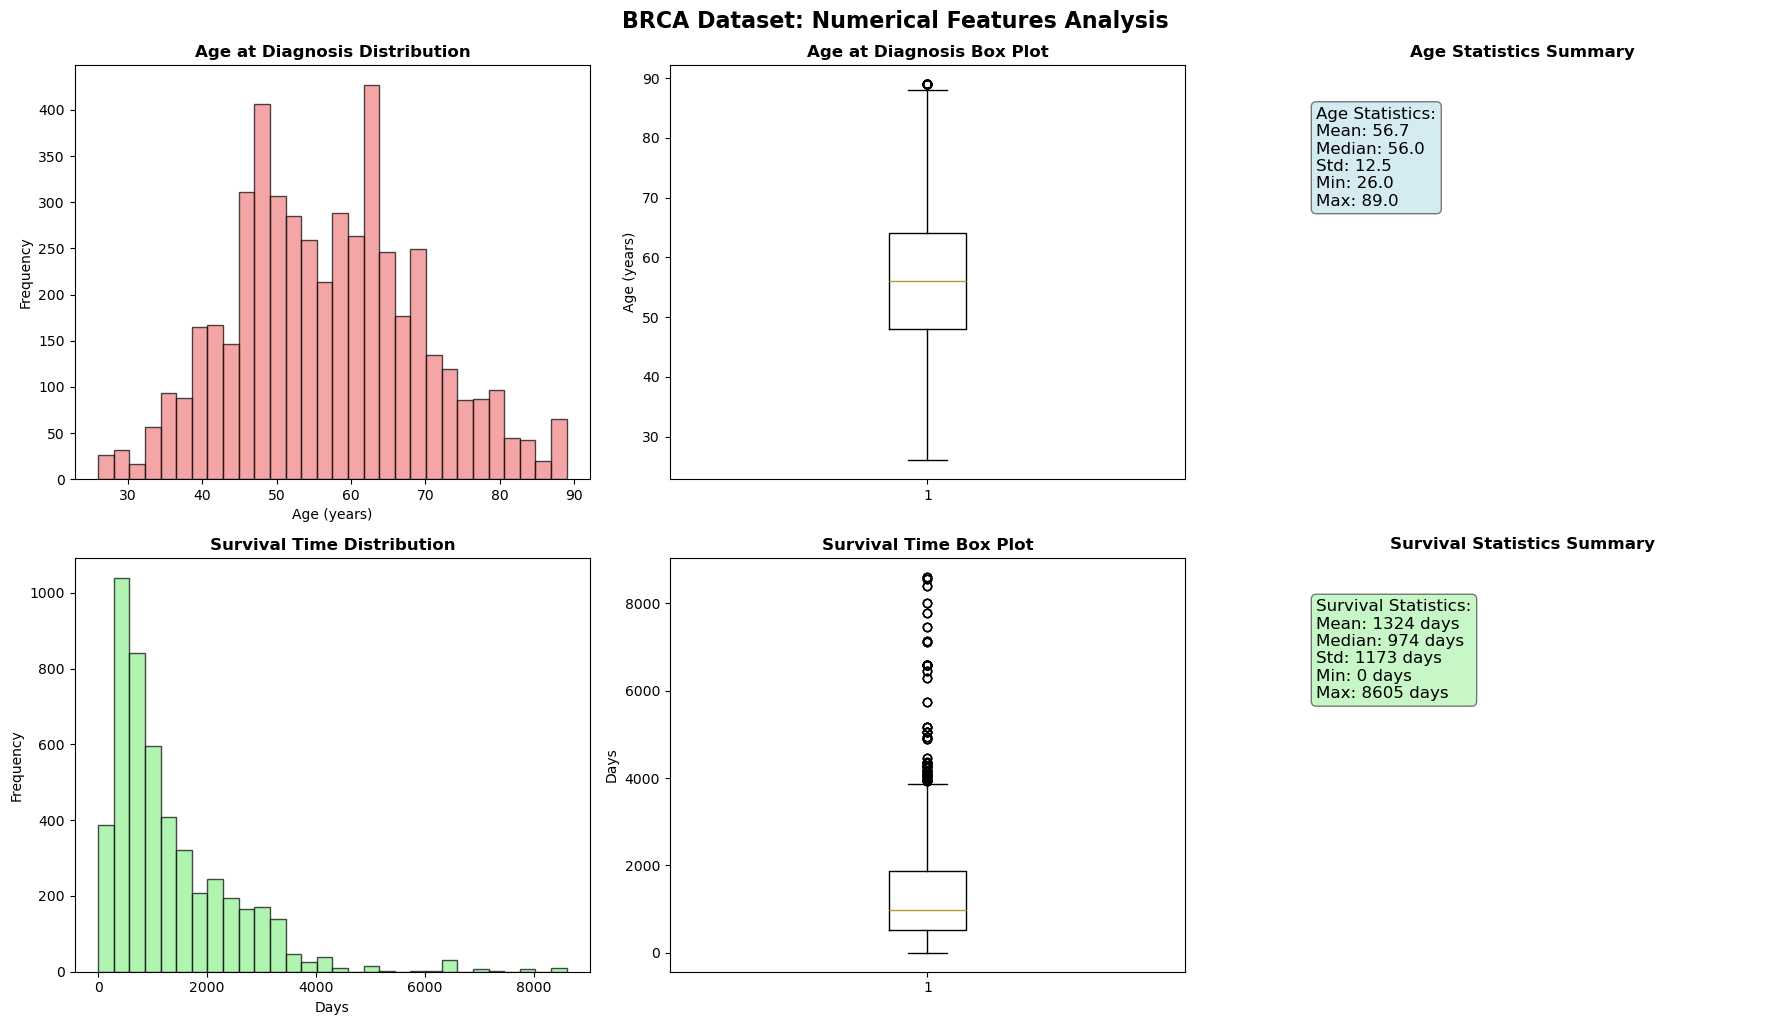

In [ ]:
#| echo: false
#| warning: false

# NUMERICAL FEATURES ANALYSIS

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age at diagnosis analysis
age_data = brca_df['diagnoses.age_at_diagnosis'].dropna()

# Histogram
axes[0, 0].hist(age_data, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age at Diagnosis Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Frequency')

# Box plot
axes[0, 1].boxplot(age_data)
axes[0, 1].set_title('Age at Diagnosis Box Plot', fontweight='bold')
axes[0, 1].set_ylabel('Age (years)')

# Statistical summary
age_stats = age_data.describe()
axes[0, 2].text(0.1, 0.9, f'Age Statistics:\nMean: {age_stats["mean"]:.1f}\nMedian: {age_stats["50%"]:.1f}\nStd: {age_stats["std"]:.1f}\nMin: {age_stats["min"]:.1f}\nMax: {age_stats["max"]:.1f}', 
               transform=axes[0, 2].transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
axes[0, 2].set_title('Age Statistics Summary', fontweight='bold')
axes[0, 2].axis('off')

# Survival time analysis
survival_data = brca_df['survival_time_days'].dropna()

if len(survival_data) > 0:
    # Histogram
    axes[1, 0].hist(survival_data, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, 0].set_title('Survival Time Distribution', fontweight='bold')
    axes[1, 0].set_xlabel('Days')
    axes[1, 0].set_ylabel('Frequency')
    
    # Box plot
    axes[1, 1].boxplot(survival_data)
    axes[1, 1].set_title('Survival Time Box Plot', fontweight='bold')
    axes[1, 1].set_ylabel('Days')
    
    # Statistical summary
    survival_stats = survival_data.describe()
    axes[1, 2].text(0.1, 0.9, f'Survival Statistics:\nMean: {survival_stats["mean"]:.0f} days\nMedian: {survival_stats["50%"]:.0f} days\nStd: {survival_stats["std"]:.0f} days\nMin: {survival_stats["min"]:.0f} days\nMax: {survival_stats["max"]:.0f} days', 
                   transform=axes[1, 2].transAxes, fontsize=12, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    axes[1, 2].set_title('Survival Statistics Summary', fontweight='bold')
    axes[1, 2].axis('off')
else:
    for ax in axes[1, :]:
        ax.text(0.5, 0.5, 'No survival data available', ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Survival Time Analysis', fontweight='bold')

plt.tight_layout()
plt.suptitle('BRCA Dataset: Numerical Features Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Univariate Analysis Findings - Numerical**
- The average age at diagnoses is 56 years old with a minimum age of 26 and a maximum age of 89 years old.
- The average survival time is 1324 days from diagnoses and ranges from 0 days to 8605 days 

## Bivariate Analysis (Two Features)
- **vital_status vs. survival_time_days**: Explore how survival time varies by vital_status, infer average survival_time_days (box plot or scatter plot).
- **age_at_diagnoses vs. average survival_time_days**: Analyze differences in average survival time by age_at_diagnoses .
- **treatment_type vs. survival_time_days**: Check how treatment_type and survival_time_days are related.
- **treatment_type vs. vital_status**: Check treatment_type s offered by vital_status.
- **ajcc_pathological_stage vs. survival_time_days**: Explore how survival time varies by ajcc_pathological_stage.
- **Survival_time_days vs. race**: Analyze survival time across different races.
- **Diagnoses behavior vs survival_time_days**: Explore how survival time varies by diagnoses behavior.


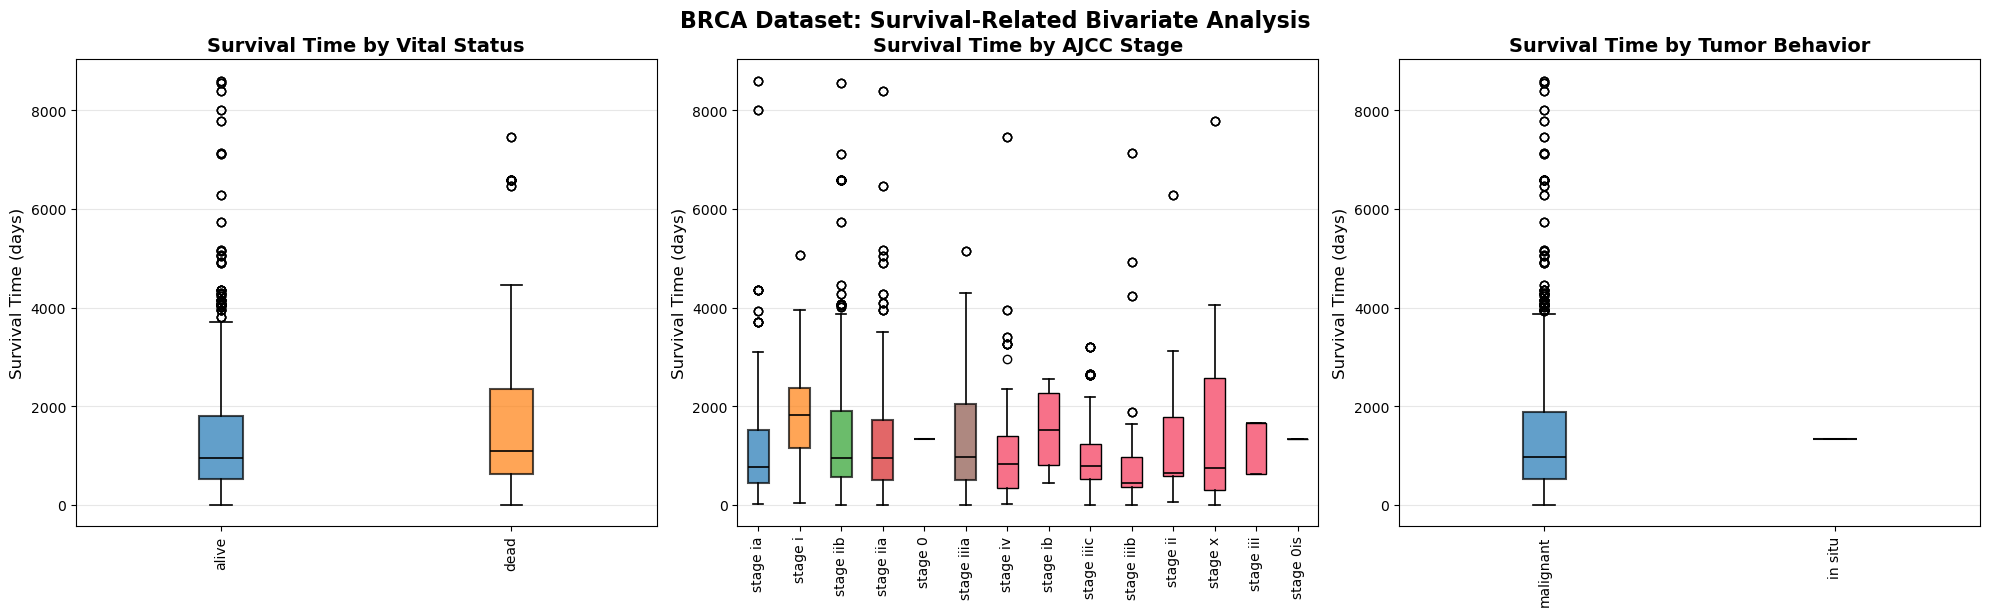

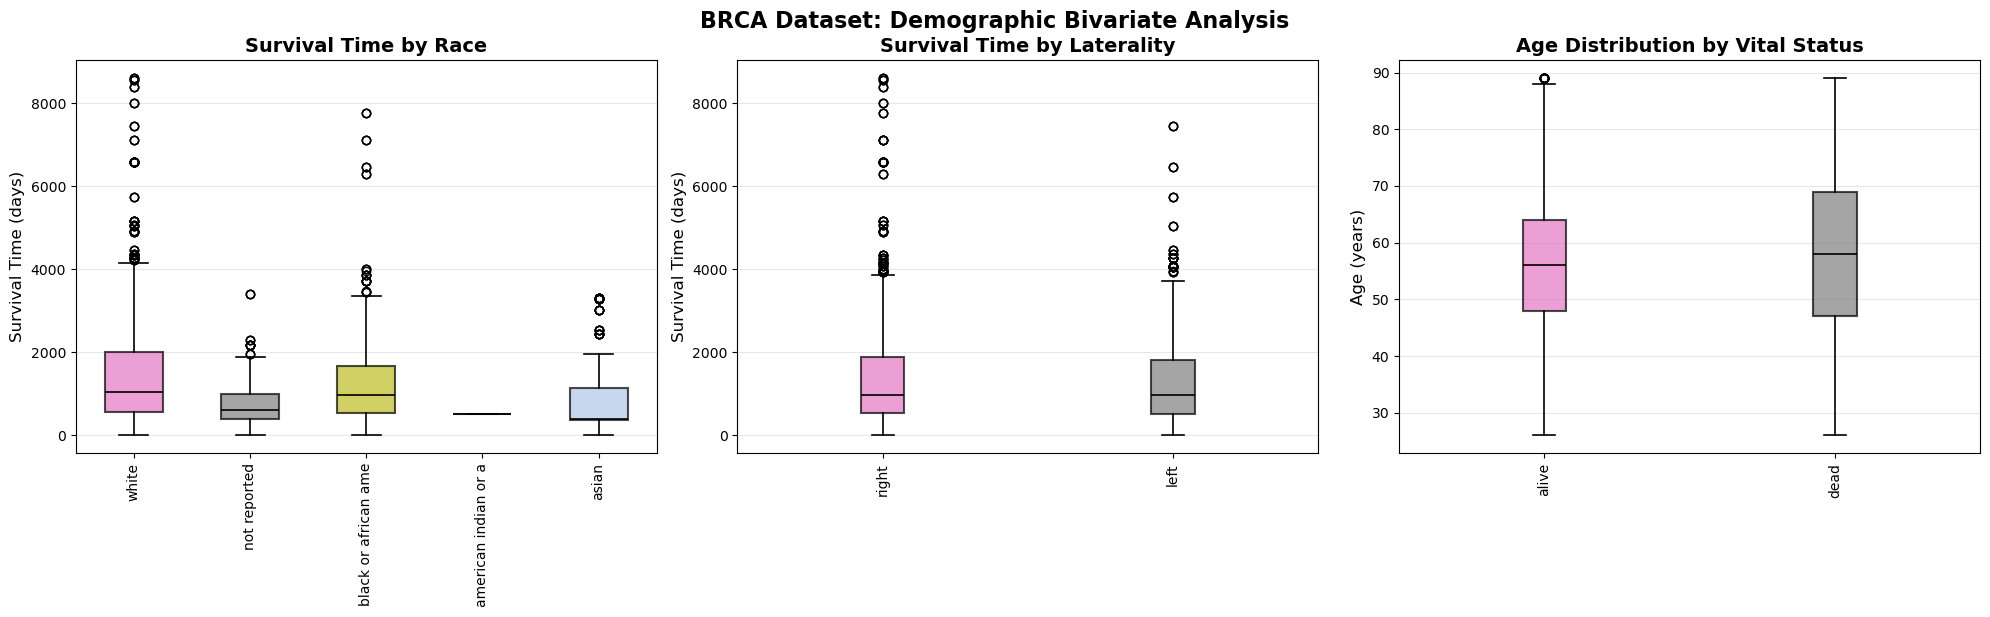

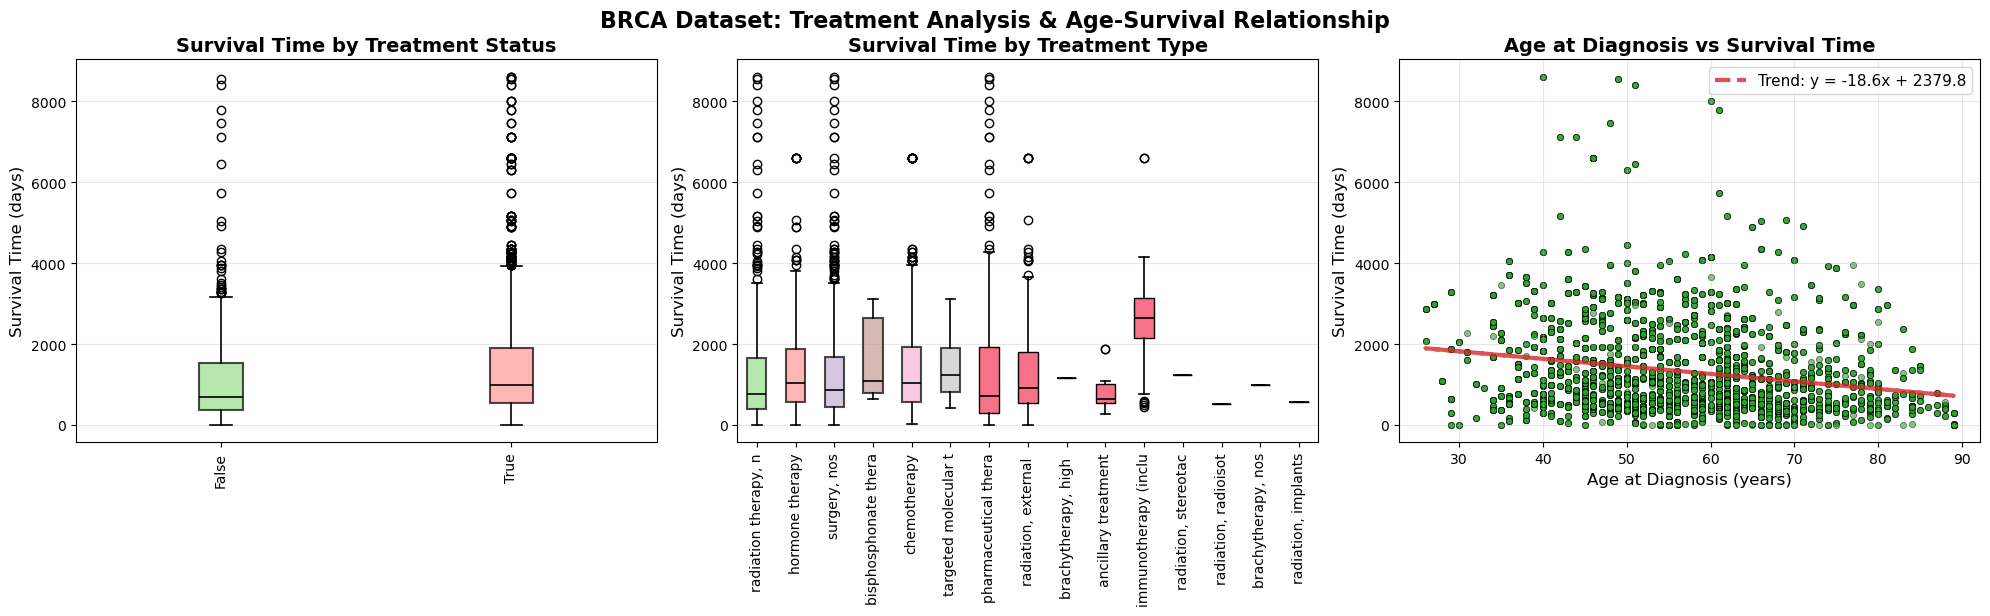

In [ ]:
#| echo: false
#| warning: false

# BIVARIATE ANALYSIS: AI Assisted for Accessibility/Presentability

# Helper function to create colorful, accessible box plots
def create_boxplot_analysis(df, cat_col, num_col, ax, title, colors):
    """Create box plot for categorical vs numerical analysis with improved accessibility"""
    categories = df[cat_col].dropna().unique()
    data_groups = []
    labels = []
    
    for cat in categories:
        subset = df[df[cat_col] == cat][num_col].dropna()
        if len(subset) > 0:
            data_groups.append(subset)
            labels.append(str(cat)[:20])  # Truncate long labels for readability
    
    if data_groups:
        # Create colorful boxplot
        bp = ax.boxplot(data_groups, labels=labels, patch_artist=True)
        
        # Apply colors to boxes
        for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
            patch.set_linewidth(1.5)
        
        # Style other elements for better visibility
        for element in ['whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp[element], color='black', linewidth=1.2)
        
        ax.set_title(title, fontweight='bold', fontsize=14)
        ax.tick_params(axis='x', rotation=90, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.grid(True, alpha=0.3, axis='y')
        return True
    return False

# Define color palettes for accessibility (colorblind-friendly)
survival_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
demographic_colors = ['#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']
treatment_colors = ['#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d3', '#c7c7c7']

# Split analyses into logical groups
survival_analyses = [
    ('demographic.vital_status', 'survival_time_days', 'Survival Time by Vital Status'),
    ('diagnoses.ajcc_pathologic_stage', 'survival_time_days', 'Survival Time by AJCC Stage'),
    ('diagnoses.behavior', 'survival_time_days', 'Survival Time by Tumor Behavior')
]

demographic_analyses = [
    ('demographic.race', 'survival_time_days', 'Survival Time by Race'),
    ('diagnoses.laterality', 'survival_time_days', 'Survival Time by Laterality'),
    ('demographic.vital_status', 'diagnoses.age_at_diagnosis', 'Age Distribution by Vital Status')
]

treatment_analyses = [
    ('treatments.treatment_or_therapy', 'survival_time_days', 'Survival Time by Treatment Status'),
    ('treatments.treatment_type', 'survival_time_days', 'Survival Time by Treatment Type')
]

# Plot Group 1: Survival-Related Analyses
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, (cat_col, num_col, title) in enumerate(survival_analyses):
    ylabel = 'Survival Time (days)' if 'survival_time' in num_col else 'Age (years)'
    success = create_boxplot_analysis(brca_df, cat_col, num_col, axes[i], title, survival_colors)
    if success:
        axes[i].set_ylabel(ylabel, fontsize=12)
    else:
        axes[i].text(0.5, 0.5, 'No data available', ha='center', va='center', 
                    transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(title, fontweight='bold', fontsize=14)

plt.tight_layout()
plt.suptitle('BRCA Dataset: Survival-Related Bivariate Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Plot Group 2: Demographic Analyses
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, (cat_col, num_col, title) in enumerate(demographic_analyses):
    ylabel = 'Survival Time (days)' if 'survival_time' in num_col else 'Age (years)'
    success = create_boxplot_analysis(brca_df, cat_col, num_col, axes[i], title, demographic_colors)
    if success:
        axes[i].set_ylabel(ylabel, fontsize=12)
    else:
        axes[i].text(0.5, 0.5, 'No data available', ha='center', va='center', 
                    transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(title, fontweight='bold', fontsize=14)

plt.tight_layout()
plt.suptitle('BRCA Dataset: Demographic Bivariate Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Plot Group 3: Treatment Analyses + Age vs Survival Scatter
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Treatment analyses
for i, (cat_col, num_col, title) in enumerate(treatment_analyses):
    ylabel = 'Survival Time (days)' if 'survival_time' in num_col else 'Age (years)'
    success = create_boxplot_analysis(brca_df, cat_col, num_col, axes[i], title, treatment_colors)
    if success:
        axes[i].set_ylabel(ylabel, fontsize=12)
    else:
        axes[i].text(0.5, 0.5, 'No data available', ha='center', va='center', 
                    transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(title, fontweight='bold', fontsize=14)

# Age vs Survival scatter plot (special case)
valid_data = brca_df[['diagnoses.age_at_diagnosis', 'survival_time_days']].dropna()
if len(valid_data) > 0:
    # Create scatter plot with improved accessibility
    scatter = axes[2].scatter(valid_data['diagnoses.age_at_diagnosis'], valid_data['survival_time_days'], 
                             alpha=0.6, color='#2ca02c', s=20, edgecolors='black', linewidth=0.5)
    axes[2].set_title('Age at Diagnosis vs Survival Time', fontweight='bold', fontsize=14)
    axes[2].set_xlabel('Age at Diagnosis (years)', fontsize=12)
    axes[2].set_ylabel('Survival Time (days)', fontsize=12)
    axes[2].grid(True, alpha=0.3)
    
    # Add trend line with high contrast
    z = np.polyfit(valid_data['diagnoses.age_at_diagnosis'], valid_data['survival_time_days'], 1)
    p = np.poly1d(z)
    axes[2].plot(valid_data['diagnoses.age_at_diagnosis'], p(valid_data['diagnoses.age_at_diagnosis']), 
                color='#d62728', linewidth=3, linestyle='--', alpha=0.8, 
                label=f'Trend: y = {z[0]:.1f}x + {z[1]:.1f}')
    axes[2].legend(fontsize=11)
else:
    axes[2].text(0.5, 0.5, 'No age vs survival data available', ha='center', va='center', 
                transform=axes[2].transAxes, fontsize=12)
    axes[2].set_title('Age at Diagnosis vs Survival Time', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.suptitle('BRCA Dataset: Treatment Analysis & Age-Survival Relationship', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Bivariate Analysis Findings**
- The survival time is slightly higher for dead patients compared to alive patients, this is likely due to many alive patients being recently diagnosed and have not had enough time to accumulate survival days.
- Older patients tend to have lower survival times compared to younger patients, this is expected as older patients tend to have more comorbidities and a weaker immune system.
- Patients who received immunotherapy tend to have higher survival times compared to other treatment types, this is likely due to immunotherapy being a more aggressive treatment option. The next type of treatment that shows higher survival times is chemotherapy.
- Patients who opted for treatment tend to have higher survival times compared to those who did not receive treatment, this is expected as treatment is designed to improve patient outcomes.
- There is lower survical times for patients with stage iiib as it is one of the more severe stages of breast cancer before metastasis (stage iv). Stage i and ib have the highest survival times as they are the least severe stages.

## Multivariate Analysis (Multiple Features)
- **ajcc_pathological_stage vs. age_at_diagnoses vs. survival_time_days** : Analyze how survival time varies across different stages and age groups (3D scatter plot or heatmap).
- **treatment_type vs. age_at_diagnoses vs. survival_time_days**: Explore trends across treatment types, age groups, and survival times (grouped bar plots).
- **laterality vs. age_at_diagnoses vs. survival_time_days**: Check if tumor laterality impacts survival time at different age groups.
- **diagnoses.behavior vs. age_at_diagnoses vs. survival_time_days**: Compare survival times across diagnoses behavior and age groups.

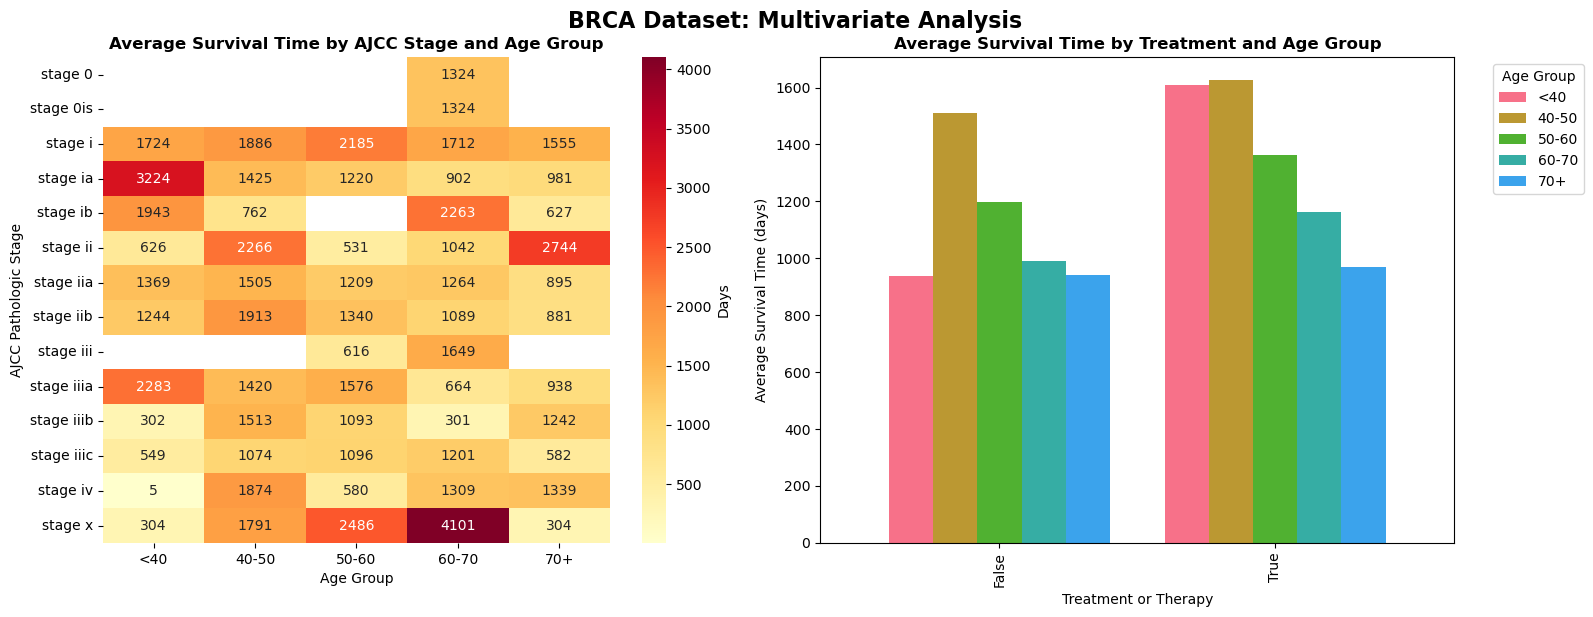

In [ ]:
#| echo: false
#| warning: false

# MULTIVARIATE ANALYSIS

# Create age groups for better visualization
brca_df['age_group'] = pd.cut(brca_df['diagnoses.age_at_diagnosis'], 
                             bins=[0, 40, 50, 60, 70, 100], 
                             labels=['<40', '40-50', '50-60', '60-70', '70+'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Helper function to create grouped analysis
def create_grouped_analysis(df, group_col, subgroup_col, value_col, ax, plot_type='heatmap'):
    """Create grouped analysis visualization"""
    try:
        if plot_type == 'heatmap':
            pivot_data = df.groupby([group_col, subgroup_col])[value_col].mean().unstack(fill_value=0)
            if not pivot_data.empty:
                sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', ax=ax, fmt='.0f', cbar_kws={'label': 'Days'})
                return True
        else:  # bar plot
            grouped_data = df.groupby([group_col, subgroup_col])[value_col].mean().unstack(fill_value=0)
            if not grouped_data.empty:
                grouped_data.plot(kind='bar', ax=ax, width=0.8)
                ax.legend(title=subgroup_col.split('.')[-1].replace('_', ' ').title(), 
                         bbox_to_anchor=(1.05, 1), loc='upper left')
                ax.tick_params(axis='x', rotation=90)
                return True
    except:
        return False
    return False

# 1. AJCC Stage vs Age vs Survival Time (Heatmap)
success = create_grouped_analysis(brca_df, 'diagnoses.ajcc_pathologic_stage', 'age_group', 
                                'survival_time_days', axes[0], 'heatmap')
axes[0].set_title('Average Survival Time by AJCC Stage and Age Group', fontweight='bold')
if success:
    axes[0].set_xlabel('Age Group')
    axes[0].set_ylabel('AJCC Pathologic Stage')
else:
    axes[0].text(0.5, 0.5, 'Insufficient data', ha='center', va='center', transform=axes[0].transAxes)

# 2. Treatment vs Age vs Survival Time
success = create_grouped_analysis(brca_df, 'treatments.treatment_or_therapy', 'age_group', 
                                'survival_time_days', axes[1], 'bar')
axes[1].set_title('Average Survival Time by Treatment and Age Group', fontweight='bold')
if success:
    axes[1].set_xlabel('Treatment or Therapy')
    axes[1].set_ylabel('Average Survival Time (days)')
else:
    axes[1].text(0.5, 0.5, 'Insufficient data', ha='center', va='center', transform=axes[1].transAxes)

plt.tight_layout()
plt.suptitle('BRCA Dataset: Multivariate Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Multivariate Analysis Findings**
- Generally, older patients tend to have lower survival times across all stages of breast cancer, with latter stages (stage iiib, iiic, iv)showing more pronounced decreases in survival time.    
- Younger patients generally have higher survival times, especially if the diagnoses is at an early stage (stage i, ib, ii).
- Stage x is when the tumor could not be assessed, the patients tend to have a higher survival time 
- Overall, getting diagnoses at an earlier stage is associated with better survival outcomes, regardless of age.
- Treatment or no treatment, there is no difference in survival times for older patients (>70 years old). However, for younger patients (< 70 years old), those who received treatment tend to have higher survival times compared to those who did not receive treatment.

## Text Analysis
- **Sites of involvement**: Word cloud or frequency distribution of common sites mentioned.

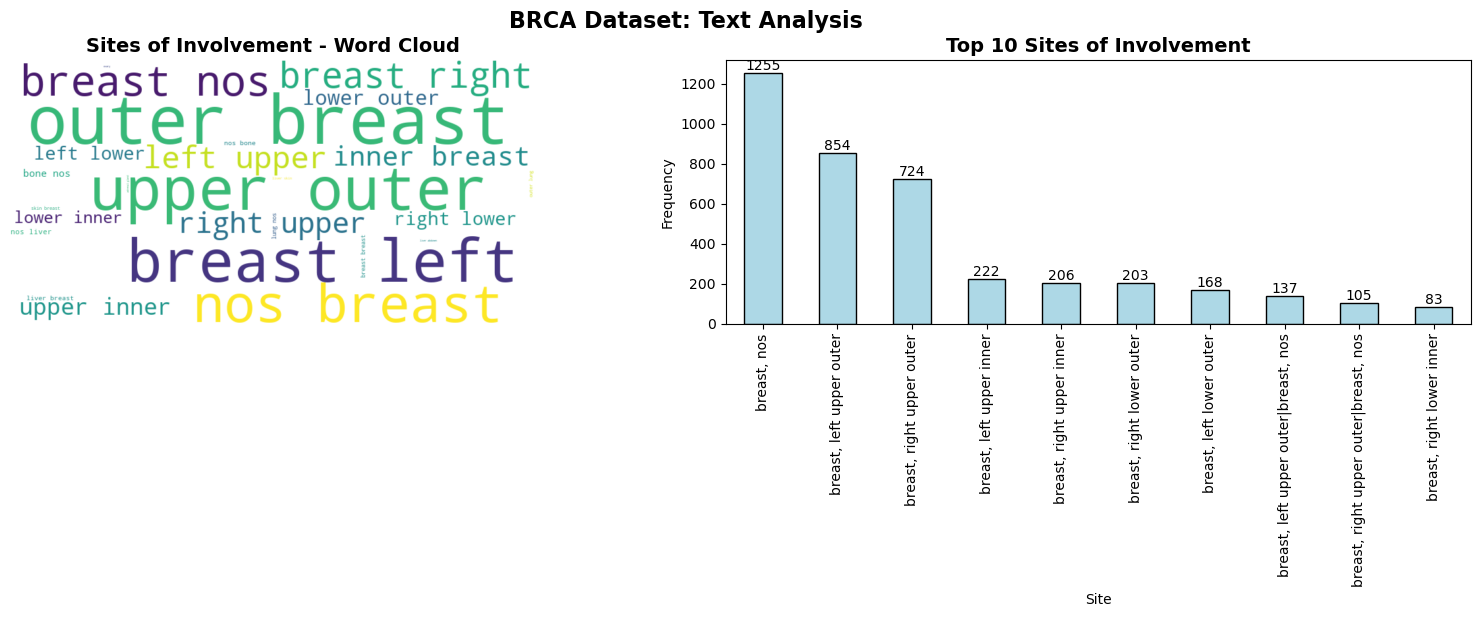

In [ ]:
#| echo: false
#| warning: false

# TEXT ANALYSIS - Sites of Involvement

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sites of involvement analysis
sites_data = brca_df['diagnoses.sites_of_involvement'].dropna()

if len(sites_data) > 0:
    # Word cloud
    sites_text = ' '.join(sites_data.astype(str))
    
    try:
        wordcloud = WordCloud(width=800, height=400, background_color='white', 
                             max_words=100, colormap='viridis').generate(sites_text)
        axes[0].imshow(wordcloud, interpolation='bilinear')
        axes[0].axis('off')
        axes[0].set_title('Sites of Involvement - Word Cloud', fontweight='bold', fontsize=14)
    except Exception as e:
        axes[0].text(0.5, 0.5, f'WordCloud generation failed:\n{str(e)}', 
                    ha='center', va='center', transform=axes[0].transAxes)
        axes[0].set_title('Sites of Involvement - Word Cloud', fontweight='bold', fontsize=14)
    
    # Frequency distribution
    sites_counts = sites_data.value_counts().head(10)
    if len(sites_counts) > 0:
        sites_counts.plot(kind='bar', ax=axes[1], color='lightblue', edgecolor='black')
        axes[1].set_title('Top 10 Sites of Involvement', fontweight='bold', fontsize=14)
        axes[1].set_xlabel('Site')
        axes[1].set_ylabel('Frequency')
        axes[1].tick_params(axis='x', rotation=90)
        
        # Add value labels on bars
        for i, bar in enumerate(axes[1].patches):
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=10)
    else:
        axes[1].text(0.5, 0.5, 'No site frequency data', ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title('Top 10 Sites of Involvement', fontweight='bold', fontsize=14)
else:
    for ax in axes:
        ax.text(0.5, 0.5, 'No sites of involvement data available', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Sites of Involvement Analysis', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.suptitle('BRCA Dataset: Text Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Text Analysis Findings**
- Text Analysis Findings reveal not difference in breast side and a slightly higher frequency for the upper outer region.    

## Correlations and Associations
- **Correlation Matrix**: Compute correlations between numerical features (e.g., age_at_diagnoses and survival_time_Days) to find relationships.

In [ ]:
#| echo: false
#| warning: false

# CORRELATIONS AND ASSOCIATIONS

# Calculate correlation between age at diagnosis and survival time
correlation_value = brca_df['diagnoses.age_at_diagnosis'].corr(brca_df['survival_time_days'])
print(f"Correlation between Age at Diagnosis and Survival Time: {correlation_value:.4f}")

Correlation between Age at Diagnosis and Survival Time: -0.1989


> There is a negative correlation between age at diagnoses and survival time days, indicating that as age at diagnoses increases, survival time days tends to decrease. This suggests that older patients may have poorer survival outcomes compared to younger patients.

In [32]:
cesc_df.head(1)

,project.project_id,cases.case_id,cases.disease_type,cases.index_date,cases.lost_to_followup,cases.primary_site,cases.submitter_id,demographic.days_to_death,demographic.ethnicity,demographic.gender,demographic.race,demographic.submitter_id,demographic.vital_status,diagnoses.age_at_diagnosis,diagnoses.ajcc_pathologic_m,diagnoses.ajcc_pathologic_n,diagnoses.ajcc_pathologic_t,diagnoses.classification_of_tumor,diagnoses.days_to_diagnosis,diagnoses.days_to_last_follow_up,diagnoses.figo_stage,diagnoses.figo_staging_edition_year,diagnoses.method_of_diagnosis,diagnoses.morphology,diagnoses.primary_diagnosis,diagnoses.prior_malignancy,diagnoses.prior_treatment,diagnoses.site_of_resection_or_biopsy,diagnoses.submitter_id,diagnoses.synchronous_malignancy,diagnoses.tissue_or_organ_of_origin,diagnoses.tumor_grade,treatments.submitter_id,treatments.treatment_or_therapy,treatments.treatment_type,survival_time_days,diagnoses.behavior,exposures.tobacco_smoking_status
0,tcga-cesc,00bca18c-b3d4-45a3-8f19-034cc40449a4,squamous cell neoplasms,diagnosis,yes,cervix uteri,tcga-c5-a2lv,NaN,not hispanic or latino,female,black or african american,tcga-c5-a2lv_demographic,alive,36.0,mx,n1,t1b,primary,0,2234.0,stage ib,1995,biopsy,8070/3,"squamous cell carcinoma, nos",False,False,cervix uteri,tcga-c5-a2lv_diagnosis,False,cervix uteri,g3,tcga-c5-a2lv_treatment3,yes,"hysterectomy, nos",2234.0,malignant,current smoker


# Cervical Cancer (CESC) Dataset Exploratory Data Analysis (EDA)

In [ ]:
#| echo: false
#| warning: false

# CESC Data Overview
print("CESC Dataset Overview:")
print(f"Shape: {cesc_df.shape}")
print(f"\nColumns: {list(cesc_df.columns)}")

CESC Dataset Overview:
Shape: (872, 38)

Columns: ['project.project_id', 'cases.case_id', 'cases.disease_type', 'cases.index_date', 'cases.lost_to_followup', 'cases.primary_site', 'cases.submitter_id', 'demographic.days_to_death', 'demographic.ethnicity', 'demographic.gender', 'demographic.race', 'demographic.submitter_id', 'demographic.vital_status', 'diagnoses.age_at_diagnosis', 'diagnoses.ajcc_pathologic_m', 'diagnoses.ajcc_pathologic_n', 'diagnoses.ajcc_pathologic_t', 'diagnoses.classification_of_tumor', 'diagnoses.days_to_diagnosis', 'diagnoses.days_to_last_follow_up', 'diagnoses.figo_stage', 'diagnoses.figo_staging_edition_year', 'diagnoses.method_of_diagnosis', 'diagnoses.morphology', 'diagnoses.primary_diagnosis', 'diagnoses.prior_malignancy', 'diagnoses.prior_treatment', 'diagnoses.site_of_resection_or_biopsy', 'diagnoses.submitter_id', 'diagnoses.synchronous_malignancy', 'diagnoses.tissue_or_organ_of_origin', 'diagnoses.tumor_grade', 'treatments.submitter_id', 'treatments.tre

## Univariate Analysis (Single Feature)
- **Frequency Counts**: For categorical features (e.g., vital_status, figo_stage, tumor_grade, treatment_type, diagnoses.behavior), visualize frequency distribution (bar charts).
- **Age Distribution**: Analyze the range and spread of age at diagnoses data (histograms, box plots).
- **Survival time distribution** See the spread of survival_time_days (histograms, box plots).
- **Race distribution**

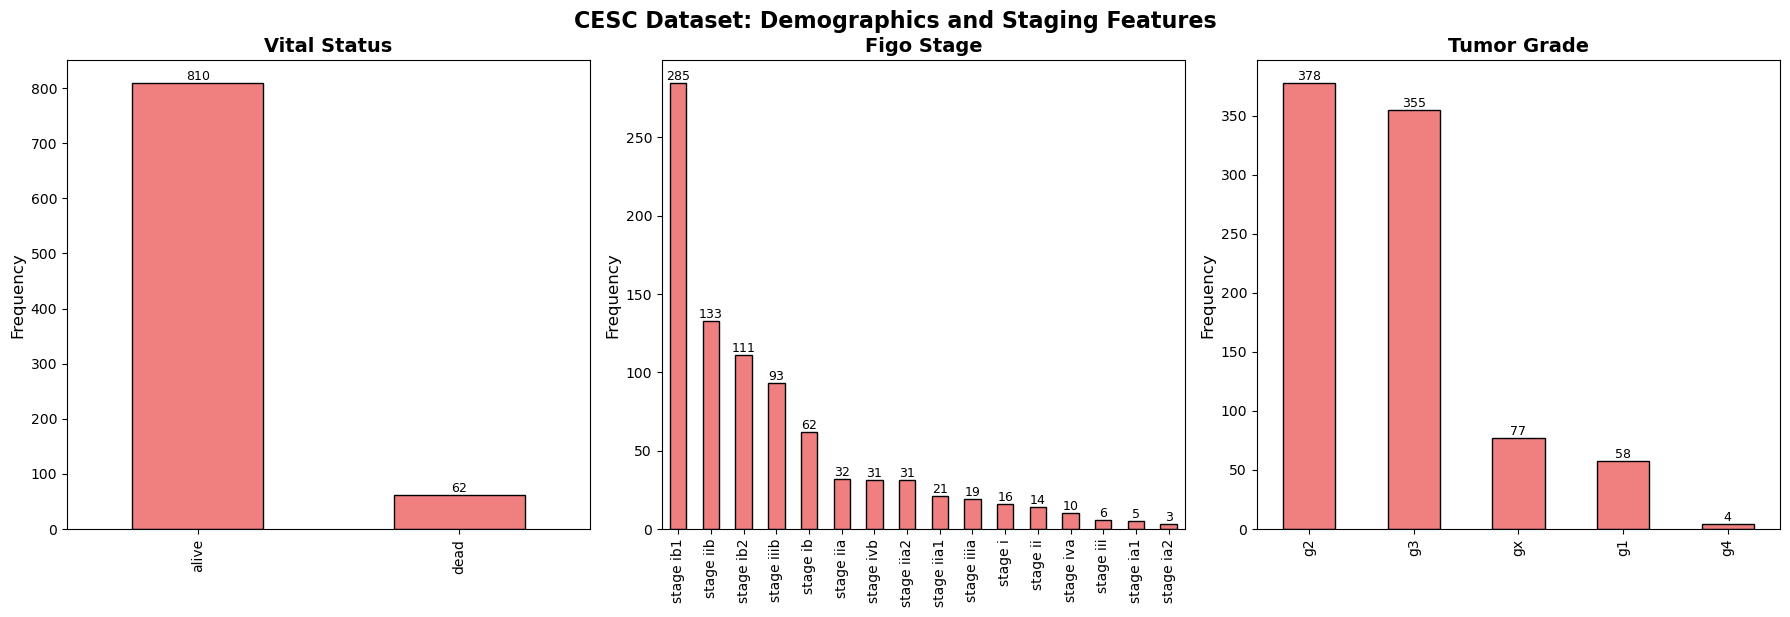

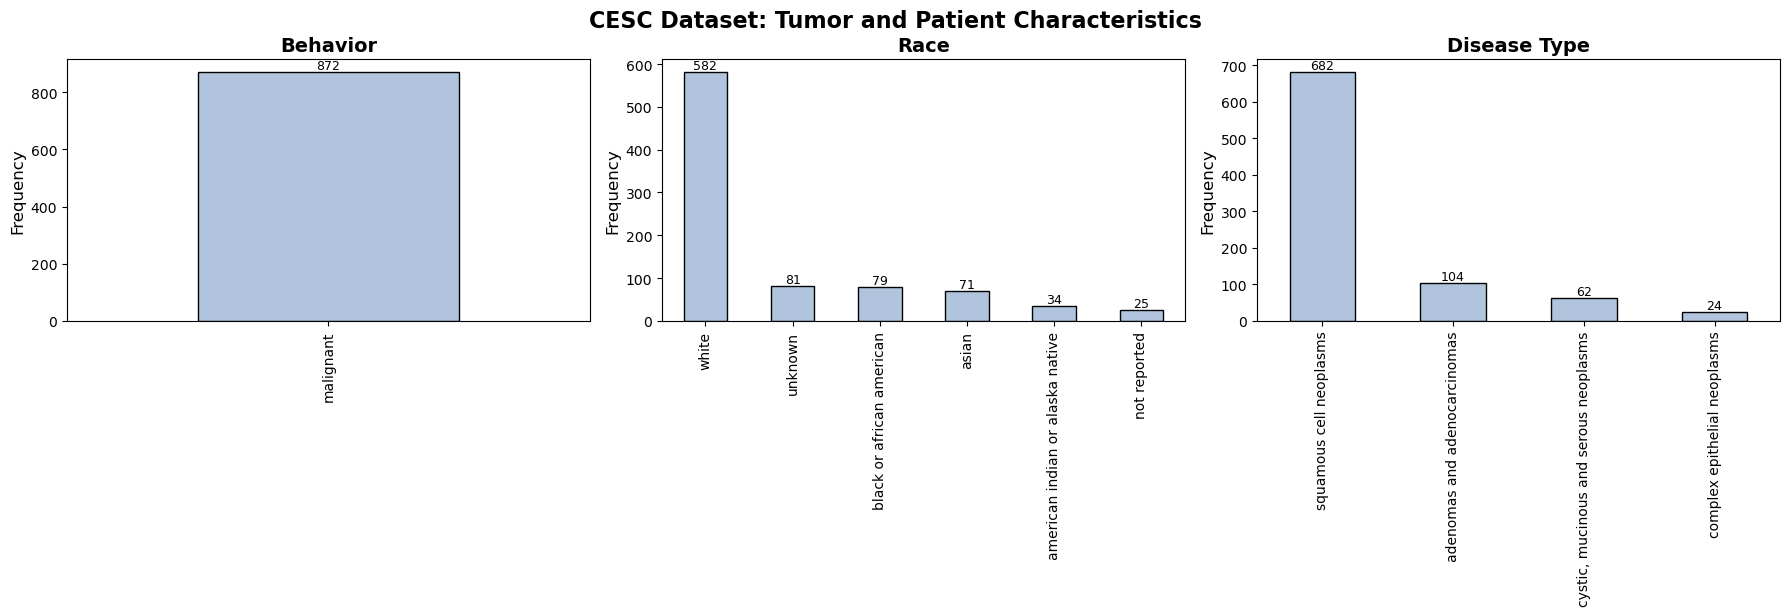

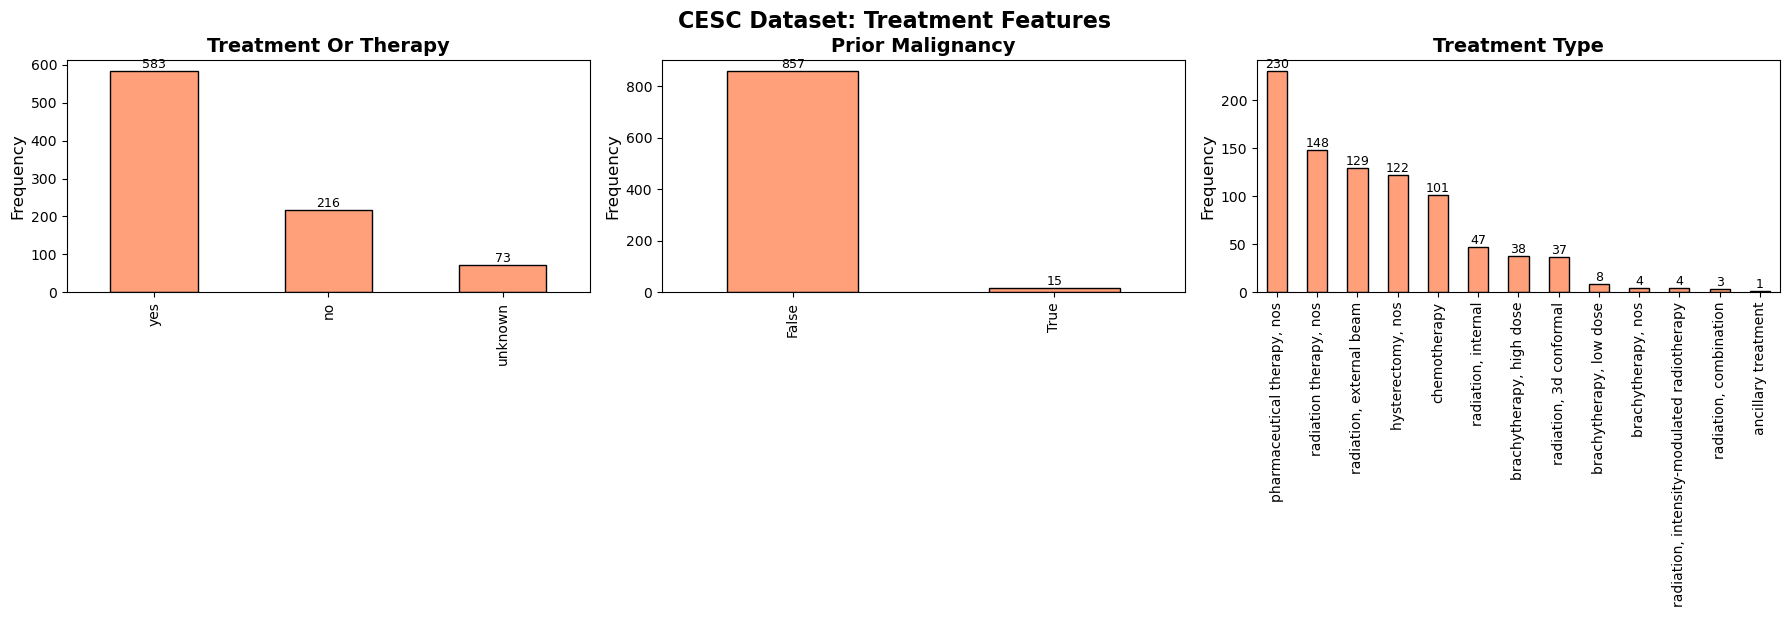

In [ ]:
#| echo: false
#| warning: false

# CESC UNIVARIATE ANALYSIS

# Key categorical features specific to cervical cancer
key_categorical_cesc = [
    'demographic.vital_status', 'diagnoses.figo_stage', 
    'diagnoses.tumor_grade', 'diagnoses.behavior', 'demographic.race',
    'cases.disease_type', 'treatments.treatment_or_therapy',
    'diagnoses.prior_malignancy', 'treatments.treatment_type'
]

# Split into three groups for better visualization
group1_cesc = key_categorical_cesc[:3]  # Demographics and staging
group2_cesc = key_categorical_cesc[3:6]  # Behavior, race, disease type
group3_cesc = key_categorical_cesc[6:]   # Treatment features

# Plot Group 1: Demographics and Staging
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(group1_cesc):
    value_counts = cesc_df[col].value_counts(dropna=False)
    value_counts.plot(kind='bar', ax=axes[i], color='lightcoral', edgecolor='black')
    axes[i].set_title(f'{col.split(".")[-1].replace("_", " ").title()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add value labels on bars
    for bar in axes[i].patches:
        height = bar.get_height()
        if height > 0:
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('CESC Dataset: Demographics and Staging Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Plot Group 2: Tumor Characteristics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(group2_cesc):
    value_counts = cesc_df[col].value_counts(dropna=False)
    value_counts.plot(kind='bar', ax=axes[i], color='lightsteelblue', edgecolor='black')
    axes[i].set_title(f'{col.split(".")[-1].replace("_", " ").title()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add value labels on bars
    for bar in axes[i].patches:
        height = bar.get_height()
        if height > 0:
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('CESC Dataset: Tumor and Patient Characteristics', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Plot Group 3: Treatment Features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(group3_cesc):
    value_counts = cesc_df[col].value_counts(dropna=False)
    value_counts.plot(kind='bar', ax=axes[i], color='lightsalmon', edgecolor='black')
    axes[i].set_title(f'{col.split(".")[-1].replace("_", " ").title()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add value labels on bars
    for bar in axes[i].patches:
        height = bar.get_height()
        if height > 0:
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('CESC Dataset: Treatment Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Univariate Analysis Findings - Categorical**
- The cervical cancer dataset is heavily imbalanced towards alive in the vital_status column, this makes sense as cervical cancer also has a high survival rate compared to many other cancers.
- The tumor grade is mostly dominated by grade ii and grade iii tumors, with very few patients having grade i tumors. 
- The stage is domniated by ib1 followed by iib and ib2, which are some of the less severe stages of cervical cancer.
- Almost 70% of the patients are white followed by an approximately equal distribution of the rest of the other races, which is not reflective of the US population
- As expected, most patients receive treatment with a majority receiving pharmaceutical therapy followed by radiation therapy.
- Last but not least, the disease type is squamous cell neoplasm. All of the patients have malignant tumors and no prior malignant cancer diagnoses.

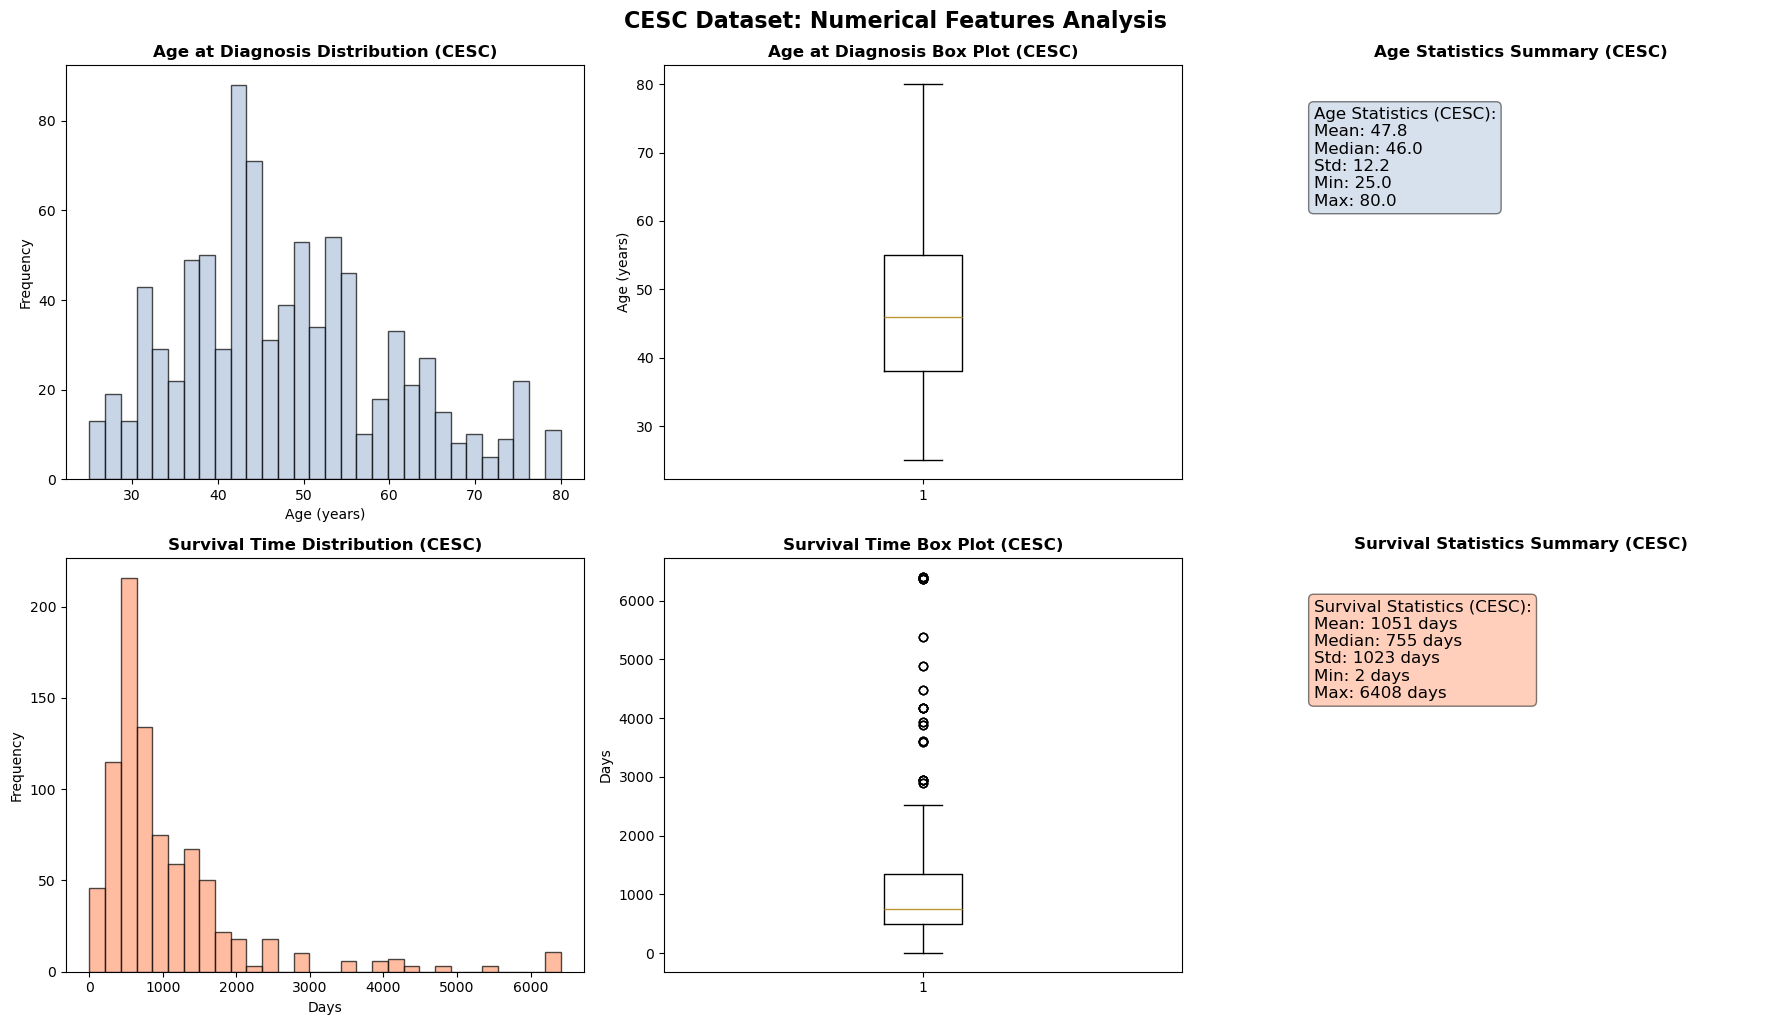

In [ ]:
#| echo: false
#| warning: false

# CESC NUMERICAL FEATURES ANALYSIS

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age at diagnosis analysis
age_data_cesc = cesc_df['diagnoses.age_at_diagnosis'].dropna()

# Histogram
axes[0, 0].hist(age_data_cesc, bins=30, color='lightsteelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age at Diagnosis Distribution (CESC)', fontweight='bold')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Frequency')

# Box plot
axes[0, 1].boxplot(age_data_cesc)
axes[0, 1].set_title('Age at Diagnosis Box Plot (CESC)', fontweight='bold')
axes[0, 1].set_ylabel('Age (years)')

# Statistical summary
age_stats_cesc = age_data_cesc.describe()
axes[0, 2].text(0.1, 0.9, f'Age Statistics (CESC):\nMean: {age_stats_cesc["mean"]:.1f}\nMedian: {age_stats_cesc["50%"]:.1f}\nStd: {age_stats_cesc["std"]:.1f}\nMin: {age_stats_cesc["min"]:.1f}\nMax: {age_stats_cesc["max"]:.1f}', 
               transform=axes[0, 2].transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.5))
axes[0, 2].set_title('Age Statistics Summary (CESC)', fontweight='bold')
axes[0, 2].axis('off')

# Survival time analysis
survival_data_cesc = cesc_df['survival_time_days'].dropna()

if len(survival_data_cesc) > 0:
    # Histogram
    axes[1, 0].hist(survival_data_cesc, bins=30, color='lightsalmon', edgecolor='black', alpha=0.7)
    axes[1, 0].set_title('Survival Time Distribution (CESC)', fontweight='bold')
    axes[1, 0].set_xlabel('Days')
    axes[1, 0].set_ylabel('Frequency')
    
    # Box plot
    axes[1, 1].boxplot(survival_data_cesc)
    axes[1, 1].set_title('Survival Time Box Plot (CESC)', fontweight='bold')
    axes[1, 1].set_ylabel('Days')
    
    # Statistical summary
    survival_stats_cesc = survival_data_cesc.describe()
    axes[1, 2].text(0.1, 0.9, f'Survival Statistics (CESC):\nMean: {survival_stats_cesc["mean"]:.0f} days\nMedian: {survival_stats_cesc["50%"]:.0f} days\nStd: {survival_stats_cesc["std"]:.0f} days\nMin: {survival_stats_cesc["min"]:.0f} days\nMax: {survival_stats_cesc["max"]:.0f} days', 
                   transform=axes[1, 2].transAxes, fontsize=12, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='lightsalmon', alpha=0.5))
    axes[1, 2].set_title('Survival Statistics Summary (CESC)', fontweight='bold')
    axes[1, 2].axis('off')
else:
    for ax in axes[1, :]:
        ax.text(0.5, 0.5, 'No survival data available', ha='center', va='center', transform=ax.transAxes)
        ax.set_title('Survival Time Analysis (CESC)', fontweight='bold')

plt.tight_layout()
plt.suptitle('CESC Dataset: Numerical Features Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Univariate Analysis Findings - Numerical**
- The average age at diagnoses is 48 years old with a minimum age of 25 and a maximum age of 80 years old.
- The average survival time is 1036 days from diagnoses and ranges from 2 days to 6408 days 

## Bivariate Analysis (Two Features)
- **vital_status vs. survival_time_days**: Explore how survival time varies by vital_status, infer average survival_time_days (box plot or scatter plot).
- **age_at_diagnoses vs. average survival_time_days**: Analyze differences in average survival time by age_at_diagnoses .
- **treatment_type vs. survival_time_days**: Check how treatment_type and survival_time_days are related.
- **treatment_type vs. vital_status**: Check treatment_type s offered by vital_status.
- **figo_stage vs. survival_time_days**: Explore how survival time varies by ajcc_pathological_stage.
- **Survival_time_days vs. race**: Analyze survival time across different races.
- **Tumor_grade vs. survival_time_days**: Explore how survival time varies by tumor_grade.
- **Diagnoses behavior vs survival_time_days**: Explore how survival time varies by diagnoses behavior.


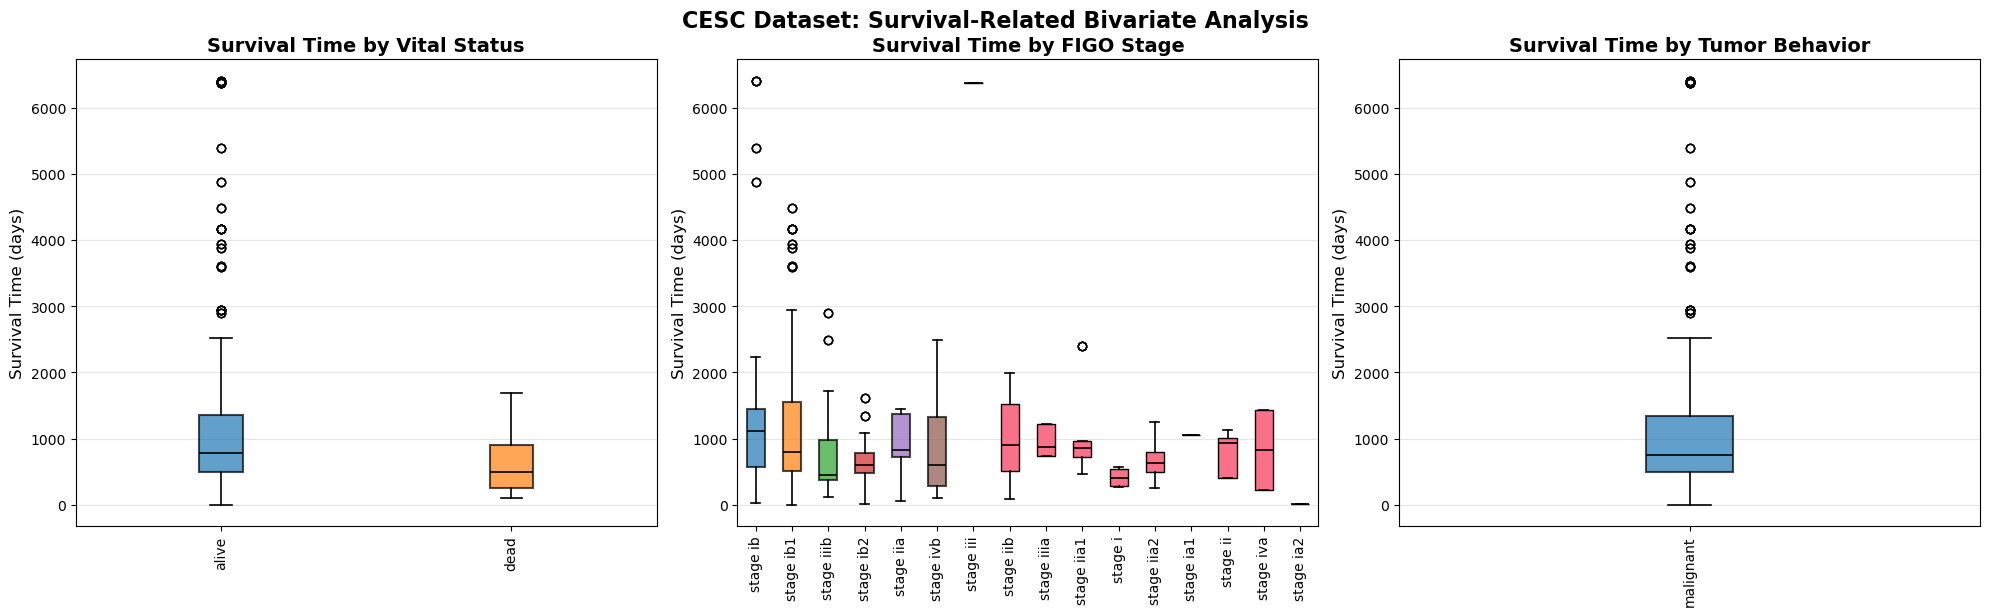

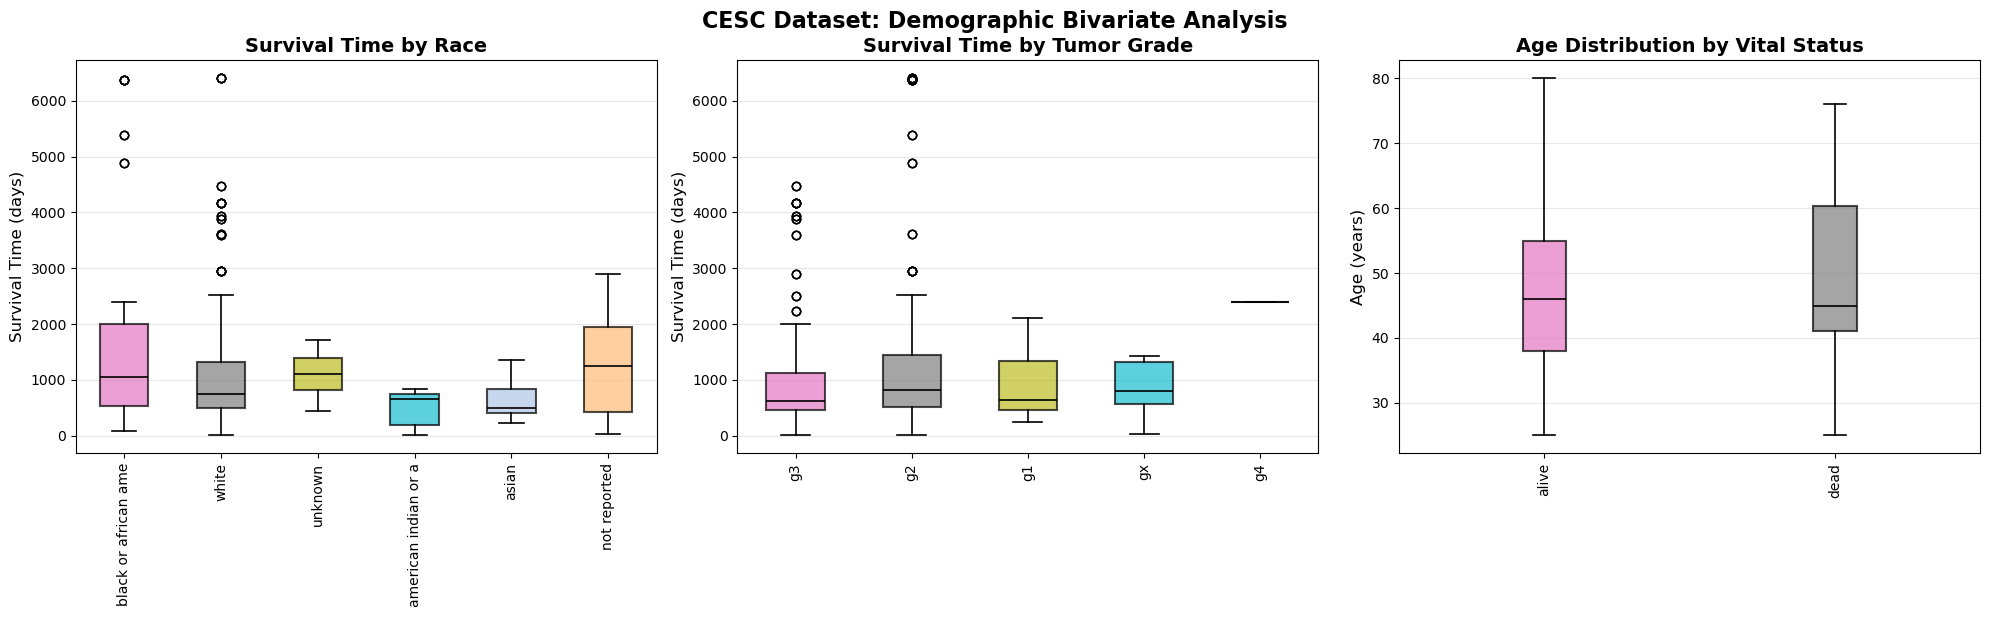

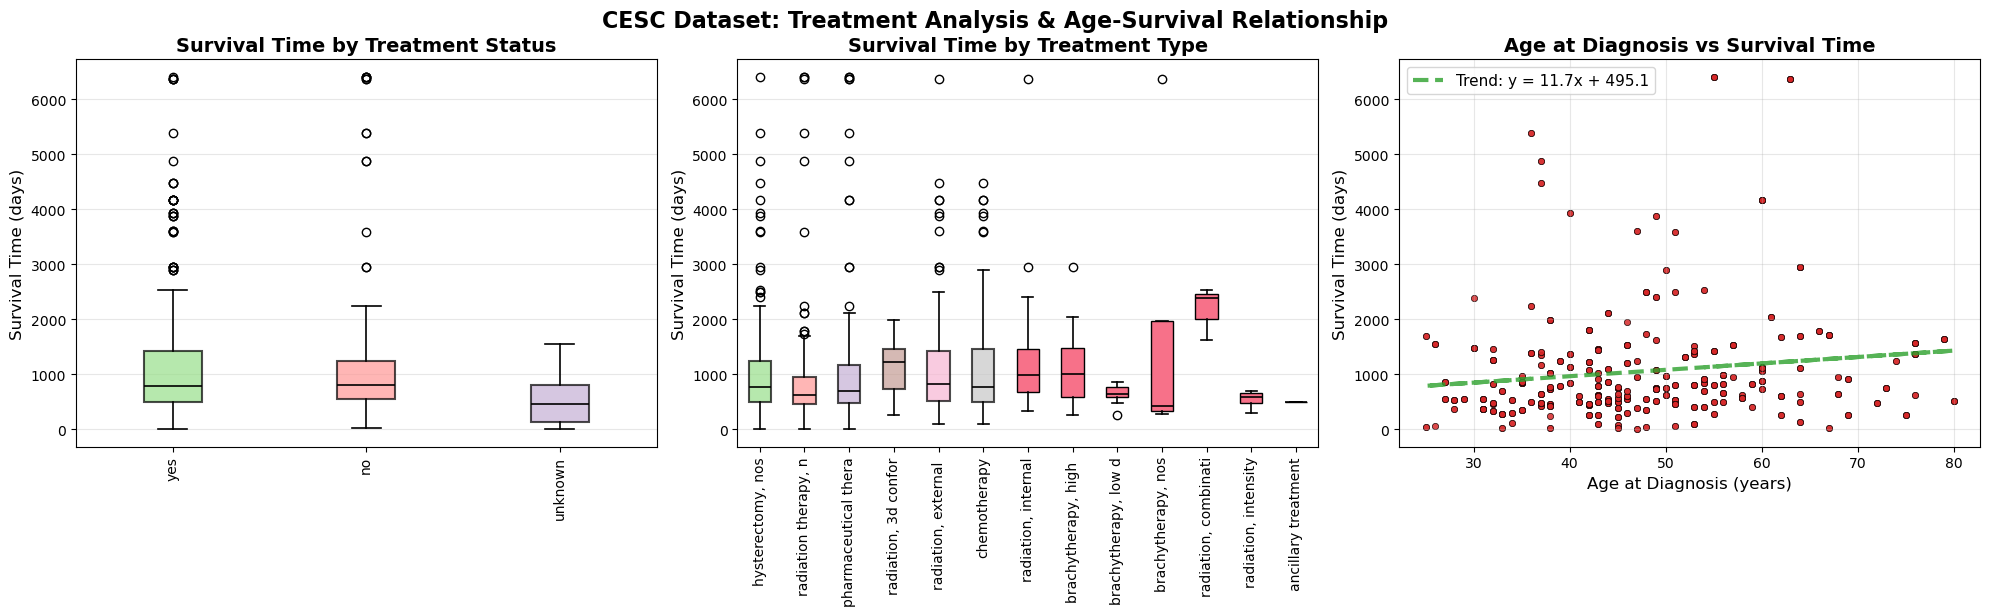

In [ ]:
#| echo: false
#| warning: false

# CESC BIVARIATE ANALYSIS

# Helper function to create colorful, accessible box plots for CESC
def create_boxplot_analysis_cesc(df, cat_col, num_col, ax, title, colors):
    """Create box plot for categorical vs numerical analysis for CESC with improved accessibility"""
    categories = df[cat_col].dropna().unique()
    data_groups = []
    labels = []
    
    for cat in categories:
        subset = df[df[cat_col] == cat][num_col].dropna()
        if len(subset) > 0:
            data_groups.append(subset)
            labels.append(str(cat)[:20])  # Truncate long labels for readability
    
    if data_groups:
        # Create colorful boxplot
        bp = ax.boxplot(data_groups, labels=labels, patch_artist=True)
        
        # Apply colors to boxes
        for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
            patch.set_linewidth(1.5)
        
        # Style other elements for better visibility
        for element in ['whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp[element], color='black', linewidth=1.2)
        
        ax.set_title(title, fontweight='bold', fontsize=14)
        ax.tick_params(axis='x', rotation=90, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.grid(True, alpha=0.3, axis='y')
        return True
    return False

# Define color palettes for accessibility (colorblind-friendly)
survival_colors_cesc = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
demographic_colors_cesc = ['#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']
treatment_colors_cesc = ['#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d3', '#c7c7c7']

# Split analyses into logical groups for CESC
survival_analyses_cesc = [
    ('demographic.vital_status', 'survival_time_days', 'Survival Time by Vital Status'),
    ('diagnoses.figo_stage', 'survival_time_days', 'Survival Time by FIGO Stage'),
    ('diagnoses.behavior', 'survival_time_days', 'Survival Time by Tumor Behavior')
]

demographic_analyses_cesc = [
    ('demographic.race', 'survival_time_days', 'Survival Time by Race'),
    ('diagnoses.tumor_grade', 'survival_time_days', 'Survival Time by Tumor Grade'),
    ('demographic.vital_status', 'diagnoses.age_at_diagnosis', 'Age Distribution by Vital Status')
]

treatment_analyses_cesc = [
    ('treatments.treatment_or_therapy', 'survival_time_days', 'Survival Time by Treatment Status'),
    ('treatments.treatment_type', 'survival_time_days', 'Survival Time by Treatment Type')
]

# Plot Group 1: Survival-Related Analyses
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, (cat_col, num_col, title) in enumerate(survival_analyses_cesc):
    ylabel = 'Survival Time (days)' if 'survival_time' in num_col else 'Age (years)'
    success = create_boxplot_analysis_cesc(cesc_df, cat_col, num_col, axes[i], title, survival_colors_cesc)
    if success:
        axes[i].set_ylabel(ylabel, fontsize=12)
    else:
        axes[i].text(0.5, 0.5, 'No data available', ha='center', va='center', 
                    transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(title, fontweight='bold', fontsize=14)

plt.tight_layout()
plt.suptitle('CESC Dataset: Survival-Related Bivariate Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Plot Group 2: Demographic Analyses
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, (cat_col, num_col, title) in enumerate(demographic_analyses_cesc):
    ylabel = 'Survival Time (days)' if 'survival_time' in num_col else 'Age (years)'
    success = create_boxplot_analysis_cesc(cesc_df, cat_col, num_col, axes[i], title, demographic_colors_cesc)
    if success:
        axes[i].set_ylabel(ylabel, fontsize=12)
    else:
        axes[i].text(0.5, 0.5, 'No data available', ha='center', va='center', 
                    transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(title, fontweight='bold', fontsize=14)

plt.tight_layout()
plt.suptitle('CESC Dataset: Demographic Bivariate Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Plot Group 3: Treatment Analyses + Age vs Survival Scatter
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Treatment analyses
for i, (cat_col, num_col, title) in enumerate(treatment_analyses_cesc):
    ylabel = 'Survival Time (days)' if 'survival_time' in num_col else 'Age (years)'
    success = create_boxplot_analysis_cesc(cesc_df, cat_col, num_col, axes[i], title, treatment_colors_cesc)
    if success:
        axes[i].set_ylabel(ylabel, fontsize=12)
    else:
        axes[i].text(0.5, 0.5, 'No data available', ha='center', va='center', 
                    transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(title, fontweight='bold', fontsize=14)

# Age vs Survival scatter plot (special case for CESC)
valid_data_cesc = cesc_df[['diagnoses.age_at_diagnosis', 'survival_time_days']].dropna()
if len(valid_data_cesc) > 0:
    # Create scatter plot with improved accessibility
    scatter = axes[2].scatter(valid_data_cesc['diagnoses.age_at_diagnosis'], valid_data_cesc['survival_time_days'], 
                             alpha=0.6, color='#d62728', s=20, edgecolors='black', linewidth=0.5)
    axes[2].set_title('Age at Diagnosis vs Survival Time', fontweight='bold', fontsize=14)
    axes[2].set_xlabel('Age at Diagnosis (years)', fontsize=12)
    axes[2].set_ylabel('Survival Time (days)', fontsize=12)
    axes[2].grid(True, alpha=0.3)
    
    # Add trend line with high contrast
    z_cesc = np.polyfit(valid_data_cesc['diagnoses.age_at_diagnosis'], valid_data_cesc['survival_time_days'], 1)
    p_cesc = np.poly1d(z_cesc)
    axes[2].plot(valid_data_cesc['diagnoses.age_at_diagnosis'], p_cesc(valid_data_cesc['diagnoses.age_at_diagnosis']), 
                color='#2ca02c', linewidth=3, linestyle='--', alpha=0.8, 
                label=f'Trend: y = {z_cesc[0]:.1f}x + {z_cesc[1]:.1f}')
    axes[2].legend(fontsize=11)
else:
    axes[2].text(0.5, 0.5, 'No age vs survival data available', ha='center', va='center', 
                transform=axes[2].transAxes, fontsize=12)
    axes[2].set_title('Age at Diagnosis vs Survival Time', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.suptitle('CESC Dataset: Treatment Analysis & Age-Survival Relationship', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Bivariate Analysis Findings**
- The survival time is slightly higher for alive patients which is expected as alive patients have had more time to accumulate survival days, unlike breast cancer where many alive patients are recently diagnosed.
- Older patients tend to have higher survival times compared to younger patients, this is unexpected as older patients tend to have more comorbidities and a weaker immune system.
- Patients who received radiation combination therapy tend to have higher survival times compared to other treatment types, this is likely due to combination therapy being a more aggressive treatment option. The next type of treatment that shows higher survival times is pharmaceutical therapy.
- There is no difference in survival times for patients who opted for treatment compared to those who did not receive treatment, which is unexpected as treatment is designed to improve patient outcomes.
- There is lower survical times for patients with stage iiib, which is one of the more severe stages of cervical cancer before metastasis (stage iv). Stage ib has the highest survival times as it is one of the least severe stages. - Stage ia2, ia1 have small sample size which might indicate need for earlier testing to catch cancer at these stages. There is no data for stage iii which might also suggest a need to shift in diagnoses to earlier stages.

## Multivariate Analysis (Multiple Features)
- **Tumor_stage vs. age_at_diagnoses vs. survival_time_days** : Analyze how survival time varies across different stages and age groups (3D scatter plot or heatmap).
- **treatment_type vs. age_at_diagnoses vs. survival_time_days**: Explore trends across treatment types, age groups, and survival times (grouped bar plots).
- **figo_stage vs. age_at_diagnoses vs. survival_time_days**: Check if stage impacts survival time at different age groups.
- **diagnoses.behavior vs. age_at_diagnoses vs. survival_time_days**: Compare survival times across diagnoses behavior and age groups.

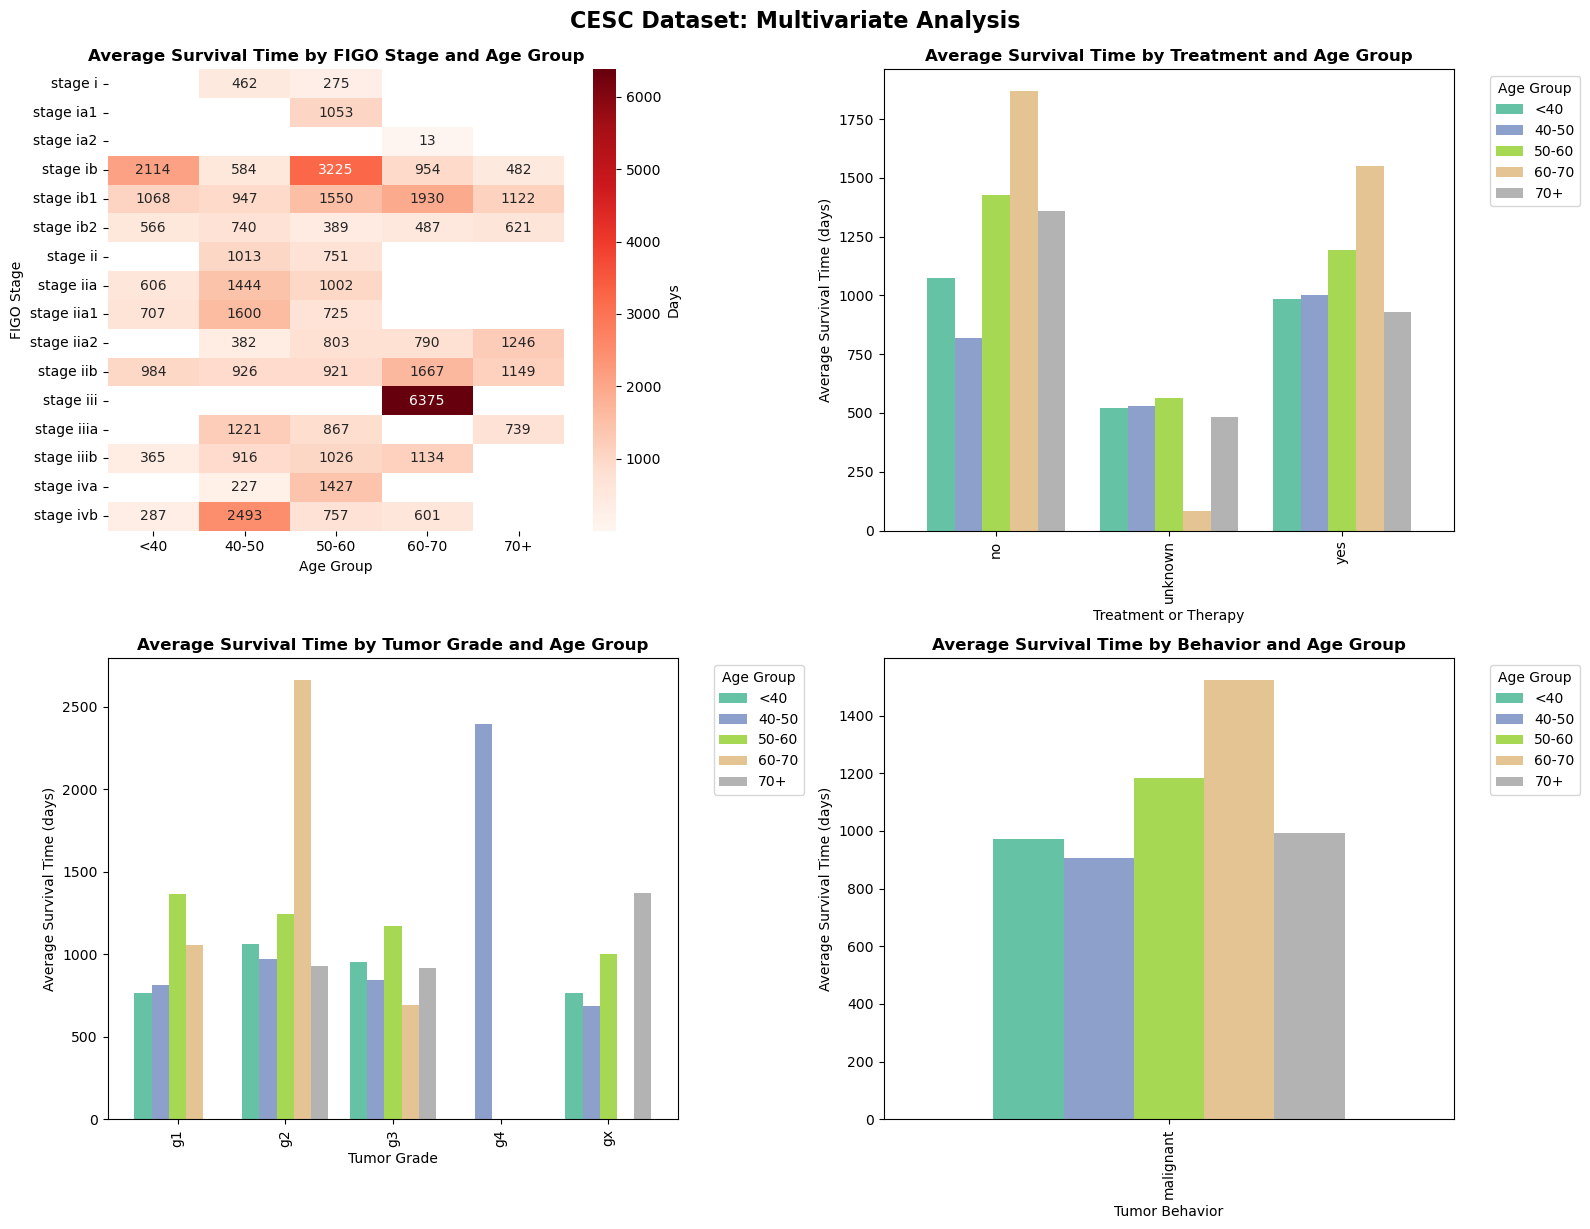

In [ ]:
#| echo: false
#| warning: false

# CESC MULTIVARIATE ANALYSIS

# Create age groups for CESC dataset
cesc_df['age_group'] = pd.cut(cesc_df['diagnoses.age_at_diagnosis'], 
                             bins=[0, 40, 50, 60, 70, 100], 
                             labels=['<40', '40-50', '50-60', '60-70', '70+'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Helper function for CESC grouped analysis
def create_grouped_analysis_cesc(df, group_col, subgroup_col, value_col, ax, plot_type='heatmap'):
    """Create grouped analysis visualization for CESC"""
    try:
        if plot_type == 'heatmap':
            pivot_data = df.groupby([group_col, subgroup_col])[value_col].mean().unstack(fill_value=0)
            if not pivot_data.empty and pivot_data.shape[0] > 0 and pivot_data.shape[1] > 0:
                sns.heatmap(pivot_data, annot=True, cmap='Reds', ax=ax, fmt='.0f', cbar_kws={'label': 'Days'})
                return True
        else:  # bar plot
            grouped_data = df.groupby([group_col, subgroup_col])[value_col].mean().unstack(fill_value=0)
            if not grouped_data.empty and grouped_data.shape[0] > 0 and grouped_data.shape[1] > 0:
                grouped_data.plot(kind='bar', ax=ax, width=0.8, colormap='Set2')
                ax.legend(title=subgroup_col.split('.')[-1].replace('_', ' ').title(), 
                         bbox_to_anchor=(1.05, 1), loc='upper left')
                ax.tick_params(axis='x', rotation=90)
                return True
    except Exception as e:
        return False
    return False

# 1. FIGO Stage vs Age vs Survival Time (Heatmap)
success = create_grouped_analysis_cesc(cesc_df, 'diagnoses.figo_stage', 'age_group', 
                                      'survival_time_days', axes[0, 0], 'heatmap')
axes[0, 0].set_title('Average Survival Time by FIGO Stage and Age Group', fontweight='bold')
if success:
    axes[0, 0].set_xlabel('Age Group')
    axes[0, 0].set_ylabel('FIGO Stage')
else:
    axes[0, 0].text(0.5, 0.5, 'Insufficient data for FIGO analysis', ha='center', va='center', transform=axes[0, 0].transAxes)

# 2. Treatment vs Age vs Survival Time
success = create_grouped_analysis_cesc(cesc_df, 'treatments.treatment_or_therapy', 'age_group', 
                                      'survival_time_days', axes[0, 1], 'bar')
axes[0, 1].set_title('Average Survival Time by Treatment and Age Group', fontweight='bold')
if success:
    axes[0, 1].set_xlabel('Treatment or Therapy')
    axes[0, 1].set_ylabel('Average Survival Time (days)')
else:
    axes[0, 1].text(0.5, 0.5, 'Insufficient data for treatment analysis', ha='center', va='center', transform=axes[0, 1].transAxes)

# 3. Tumor Grade vs Age vs Survival Time
success = create_grouped_analysis_cesc(cesc_df, 'diagnoses.tumor_grade', 'age_group', 
                                      'survival_time_days', axes[1, 0], 'bar')
axes[1, 0].set_title('Average Survival Time by Tumor Grade and Age Group', fontweight='bold')
if success:
    axes[1, 0].set_xlabel('Tumor Grade')
    axes[1, 0].set_ylabel('Average Survival Time (days)')
else:
    axes[1, 0].text(0.5, 0.5, 'Insufficient data for tumor grade analysis', ha='center', va='center', transform=axes[1, 0].transAxes)

# 4. Tumor Behavior vs Age vs Survival Time
success = create_grouped_analysis_cesc(cesc_df, 'diagnoses.behavior', 'age_group', 
                                      'survival_time_days', axes[1, 1], 'bar')
axes[1, 1].set_title('Average Survival Time by Behavior and Age Group', fontweight='bold')
if success:
    axes[1, 1].set_xlabel('Tumor Behavior')
    axes[1, 1].set_ylabel('Average Survival Time (days)')
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient data for behavior analysis', ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.suptitle('CESC Dataset: Multivariate Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Multivariate Analysis Findings**
- Generally, earlier stages show higher survival times across all age groups.
- The heatmap plot interpretation is obfuscated by missing data at stages but also younger patients will have lower survival times due to less time to accumulate survival days. 

## Correlations and Associations
- **Correlation Matrix**: Compute correlations between numerical features (e.g., age_at_diagnoses and survival_time_Days) to find relationships.

In [ ]:
#| echo: false
#| warning: false

# CORRELATIONS AND ASSOCIATIONS

# Calculate correlation between age at diagnosis and survival time
correlation_value = cesc_df['diagnoses.age_at_diagnosis'].corr(cesc_df['survival_time_days'])
print(f"Correlation between Age at Diagnosis and Survival Time: {correlation_value:.4f}")

Correlation between Age at Diagnosis and Survival Time: 0.1390


There is a positive correlation between age at diagnoses and survival time days, indicating that as age at diagnoses increases, survival time days tends to increase. This suggests that older patients may have better survival outcomes compared to younger patients but this is unexpected, potentially due to less survival days accumulated by younger patients.

## Smoking Exposure Effect on survival time for CESC patients
- **smoking_exposure vs. survival_time_days**: Analyze how smoking exposure impacts survival time (box plots or histograms).

Smoking Status Distribution in CESC Dataset:
exposures.tobacco_smoking_status
lifelong non-smoker                                553
current smoker                                     142
current reformed smoker for < or = 15 yrs           94
not reported                                        29
unknown                                             23
current reformed smoker for > 15 yrs                20
current reformed smoker, duration not specified     11
Name: count, dtype: int64

Total patients with smoking data: 872


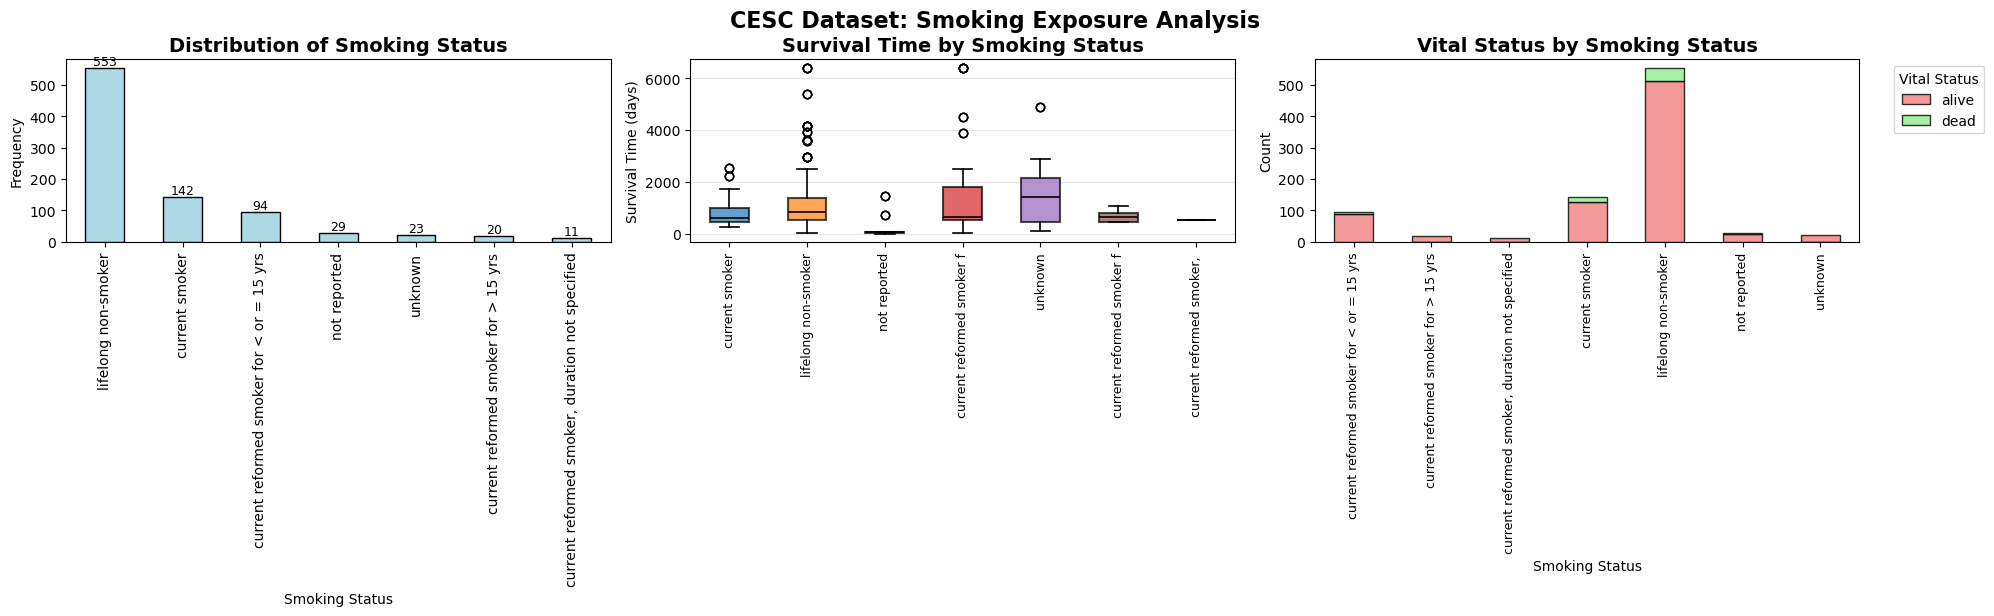


SMOKING EXPOSURE SURVIVAL ANALYSIS SUMMARY

Insufficient data for statistical comparison between never smokers and current smokers



In [ ]:
#| echo: false
#| warning: false

# Explore effect of smoking exposure on survival time for CESC: AI Assisted Analysis

# First, let's examine the smoking status distribution
print("Smoking Status Distribution in CESC Dataset:")
smoking_counts = cesc_df['exposures.tobacco_smoking_status'].value_counts(dropna=False)
print(smoking_counts)
print(f"\nTotal patients with smoking data: {smoking_counts.sum()}")

# Create comprehensive smoking exposure analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Smoking Status Distribution (Bar Plot)
smoking_counts.plot(kind='bar', ax=axes[0], color='lightblue', edgecolor='black')
axes[0].set_title('Distribution of Smoking Status', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Smoking Status')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=90, labelsize=10)

# Add value labels on bars
for i, bar in enumerate(axes[0].patches):
    height = bar.get_height()
    if height > 0:
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 2. Smoking Status vs Survival Time (Box Plot)
smoking_categories = cesc_df['exposures.tobacco_smoking_status'].dropna().unique()
smoking_data_groups = []
smoking_labels = []

for cat in smoking_categories:
    subset = cesc_df[cesc_df['exposures.tobacco_smoking_status'] == cat]['survival_time_days'].dropna()
    if len(subset) > 0:
        smoking_data_groups.append(subset)
        smoking_labels.append(str(cat)[:25])  # Truncate for readability

if smoking_data_groups:
    # Create colorful boxplot with accessibility
    bp = axes[1].boxplot(smoking_data_groups, labels=smoking_labels, patch_artist=True)
    
    # Apply colorblind-friendly colors
    smoking_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
    for patch, color in zip(bp['boxes'], smoking_colors[:len(bp['boxes'])]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        patch.set_linewidth(1.5)
    
    # Style elements for better visibility
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='black', linewidth=1.2)
    
    axes[1].set_title('Survival Time by Smoking Status', fontweight='bold', fontsize=14)
    axes[1].set_ylabel('Survival Time (days)')
    axes[1].tick_params(axis='x', rotation=90, labelsize=9)
    axes[1].grid(True, alpha=0.3, axis='y')

# 3. Smoking Status vs Vital Status (Stacked Bar)
smoking_vital_crosstab = pd.crosstab(cesc_df['exposures.tobacco_smoking_status'], 
                                    cesc_df['demographic.vital_status'], 
                                    dropna=False)
if not smoking_vital_crosstab.empty:
    smoking_vital_crosstab.plot(kind='bar', stacked=True, ax=axes[2], 
                               color=['lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')
    axes[2].set_title('Vital Status by Smoking Status', fontweight='bold', fontsize=14)
    axes[2].set_xlabel('Smoking Status')
    axes[2].set_ylabel('Count')
    axes[2].tick_params(axis='x', rotation=90, labelsize=9)
    axes[2].legend(title='Vital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.suptitle('CESC Dataset: Smoking Exposure Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Simplified Smoking Categories Analysis for summary
def categorize_smoking(status):
    if pd.isna(status) or status in ['Not Reported', 'Unknown']:
        return 'Unknown/Not Reported'
    elif 'Non-Smoker' in str(status):
        return 'Never Smoker'
    elif 'Current Smoker' in str(status):
        return 'Current Smoker'
    elif 'Reformed' in str(status):
        return 'Former Smoker'
    else:
        return 'Other'

cesc_df['smoking_simplified'] = cesc_df['exposures.tobacco_smoking_status'].apply(categorize_smoking)

# Print summary statistics
print("\n" + "="*60)
print("SMOKING EXPOSURE SURVIVAL ANALYSIS SUMMARY")
print("="*60)


# Statistical test (if enough data)
from scipy import stats

never_smokers = cesc_df[cesc_df['smoking_simplified'] == 'Never Smoker']['survival_time_days'].dropna()
current_smokers = cesc_df[cesc_df['smoking_simplified'] == 'Current Smoker']['survival_time_days'].dropna()

if len(never_smokers) > 5 and len(current_smokers) > 5:
    t_stat, p_value = stats.ttest_ind(never_smokers, current_smokers)
    print(f"\n" + "="*60)
    print("STATISTICAL COMPARISON: Never Smokers vs Current Smokers")
    print("="*60)
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Result: Statistically significant difference in survival times")
    else:
        print("Result: No statistically significant difference in survival times")
else:
    print(f"\nInsufficient data for statistical comparison between never smokers and current smokers")

print("\n" + "="*60)

There is a heavy imbalance towards lifelong non-smoker in the tobacco smoking status column which might indicate underreporting or misclassification of smoking status among cervical cancer patients. This results suggests that smoking status may not be a reliable indicator of cervical cancer risk in this dataset. From survival time by smoking status, lifelong non-smokers and unknowen tend to have higher survival times compared to current smokers and former smokers. However, there is insufficient data to draw definitive conclusions about the impact of smoking status on survival time in cervical cancer patients.

# Summary of Findings

The exploratory analysis of both breast cancer (BRCA) and cervical cancer (CESC) datasets reveals important insights into patient demographics, tumor characteristics, treatments, and survival outcomes, highlighting both similarities and disease-specific differences. In both cancers, the vital status column is heavily skewed towards alive, reflecting the generally high survival rates for these cancers. However, survival dynamics differ when stratified by age, stage, and treatment type.

For breast cancer, patients’ average age at diagnosis is 56 years, with survival time averaging 1,324 days. Survival decreases with age, likely due to comorbidities and decreased physiological resilience. Stage-specific analysis shows that early-stage tumors (Stage I and IB) have the highest survival, while more advanced stages (Stage IIIB, IIIC, IV) exhibit lower survival. Interestingly, Stage X, indicating unassessable tumors, is associated with relatively higher survival, possibly reflecting early detection or missing stage data for indolent tumors. Treatment plays a clear role in outcomes; patients receiving immunotherapy or chemotherapy exhibit higher survival, particularly among those under 70 years, whereas older patients (>70) show minimal differences with or without treatment. Tumor type is largely ductal or lobular, and no laterality effect is observed, consistent with previous literature on breast cancer prognosis @siegel2023cancer.

Cervical cancer presents a younger cohort, with a mean age at diagnosis of 48 years and average survival of 1,036 days. The majority of tumors are squamous cell carcinomas, predominantly grade II or III, with stages dominated by IB1, IB2, and IIB. Unlike breast cancer, survival shows a slightly positive correlation with age, an unexpected pattern likely influenced by fewer accumulated survival days for younger patients and missing data. While treatment generally includes pharmaceutical therapy and radiation, survival differences between treated and untreated patients are negligible, suggesting either dataset limitations or variability in treatment efficacy. Notably, stage IIIB is associated with lower survival, reinforcing the established correlation between advanced stage and poorer outcomes @arbyn2020cervical .

Comparing both cancers, early-stage detection consistently correlates with better survival outcomes, underlining the importance of screening programs. While breast cancer survival is more sensitive to age and treatment, cervical cancer survival appears more influenced by tumor grade and stage, with age playing an unexpected role due to dataset-specific factors. Racial composition differs, with breast cancer patients predominantly white and African American, reflecting the U.S. population, whereas cervical cancer data shows less representativeness, potentially limiting generalizability.

Exposure analysis, particularly tobacco smoking status in cervical cancer, reveals a strong bias towards lifelong non-smokers, likely due to underreporting. This prevents definitive conclusions regarding the role of smoking in survival outcomes, although current and former smokers tend to show shorter survival times. In breast cancer, while similar exposure data were not highlighted, established literature suggests that lifestyle and hormonal factors play a role in risk and outcomes @collaborative2002hormonal .

In summary, both breast and cervical cancer datasets emphasize the critical role of early detection and stage at diagnosis in determining survival. Treatment type is a more decisive factor for breast cancer outcomes than cervical cancer, and age interacts differently with survival in the two diseases. Exposure variables such as smoking require careful interpretation due to potential biases and missing data. These findings reinforce the need for comprehensive data collection and stratified analyses to improve prognostic modeling and targeted interventions across cancer types.

**References:**

* Siegel RL, Miller KD, Fuchs HE, Jemal A. Cancer Statistics, 2023. CA Cancer J Clin. 2023;73(1):17–48.
* Arbyn M, Weiderpass E, Bruni L, et al. Estimates of incidence and mortality of cervical cancer in 2018: a worldwide analysis. Lancet Glob Health. 2020;8(2):e191–203.
* Collaborative Group on Hormonal Factors in Breast Cancer. Breast cancer and hormonal contraceptives: collaborative reanalysis of individual data on 53,297 women with breast cancer and 100,239 women without breast cancer. Lancet. 2002;360:1040–1054.

# Code 

Code files for EDA can be found [here](https://github.com/dsan-5000/fall-2025-project-Munashe22/tree/main/technical-details/eda)